In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import datetime
import numpy as np
from collections import Counter
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# # 집 전용
# data = pd.read_csv('./use_data/(완)[KOBIS] 박스오피스_일별(2003~2022)_장르_수정.csv')
# data

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
0,1,동갑내기 과외하기,2003-02-07,12세관람가,코미디,한국,한국,코리아 엔터테인먼트,CJ ENM,김경형,"김하늘,권상우,공유,김지우,백일섭,김혜옥,김자옥,오승근,이성진,손영민,송병철,신지현...",2003-01-12,633500,633500,102,102,1,1
1,1,매트릭스3 레볼루션,2003-11-05,15세관람가,"SF,액션,범죄",미국,미국,NaN,워너브러더스 코리아(주),"릴리 워쇼스키,라나 워쇼스키","키아누 리브스,로렌스 피쉬번,캐리 앤 모스",2003-11-11,7676000,7676000,870,870,6,16
2,2,위대한 유산,2003-10-24,15세관람가,코미디,한국,한국,CJ ENM,CJ ENM,오상훈,"김선아,임창정,최무인,송은정,홍금봉,신성아,김대중,오유진,유순철,신이,모지은,김기천...",2003-11-11,1658000,1658000,177,177,1,3
3,3,황산벌,2003-10-17,15세관람가,코미디,한국,한국,(주)씨네월드,(주)씨네월드,이준익,"박중훈,정진영,오지명,김병철,김선아,김윤태,이문식,조대은,김만수,김현두,나수원,조철...",2003-11-11,1257000,1257000,116,116,1,3
4,4,아이덴티티,2003-10-31,15세관람가,"범죄,스릴러",미국,미국,콜럼비아트라이스타,콜럼비아트라이스타,제임스 맨골드,"존 쿠삭,레이 리오타",2003-11-11,821000,821000,102,102,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482747,34,애프터 양,2022-06-01,전체관람가,"드라마,SF",미국,미국,NaN,"(주)영화특별시에스엠씨,주식회사 왓챠",코고나다,콜린 파렐,2022-12-31,629910,389758300,90,40233,1,1
482748,31,더 메뉴,2022-12-07,15세이상관람가,스릴러,미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,마크 미로드,"랄프 파인즈,안야 테일러 조이,니콜라스 홀트,자넷 맥티어,주디스 라이트,존 레귀자모",2022-12-31,1047000,320680200,107,31360,3,3
482749,28,양자경의 더 모든 날 모든 순간,2022-11-23,15세이상관람가,"액션,코미디",미국,미국,NaN,워터홀컴퍼니(주),"다니엘 콴,다니엘 쉐이너트","양자경,스테파니 수,키 호이 콴,제이미 리 커티스",2022-12-31,2703789,291016371,276,27325,7,8
482750,26,캐리와 슈퍼콜라,2023-01-18,전체관람가,애니메이션,한국,한국,(주)캐리소프트,롯데컬처웍스(주)롯데엔터테인먼트,"오성윤,이춘백","최정윤,엄상현,이다은,원옥화,정주원,이창민,한상태,김지정,강나후,김신비,소경호",2022-12-31,3993000,3993000,295,295,1,1


In [6]:
# 학원용
data = pd.read_csv('./use_data_3/(완)[KOBIS] 박스오피스_일별(2003~2022)_장르_수정.csv')
data

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
0,1,동갑내기 과외하기,2003-02-07,12세관람가,코미디,한국,한국,코리아 엔터테인먼트,CJ ENM,김경형,"김하늘,권상우,공유,김지우,백일섭,김혜옥,김자옥,오승근,이성진,손영민,송병철,신지현...",2003-01-12,633500,633500,102,102,1,1
1,1,매트릭스3 레볼루션,2003-11-05,15세관람가,"SF,액션,범죄",미국,미국,NaN,워너브러더스 코리아(주),"릴리 워쇼스키,라나 워쇼스키","키아누 리브스,로렌스 피쉬번,캐리 앤 모스",2003-11-11,7676000,7676000,870,870,6,16
2,2,위대한 유산,2003-10-24,15세관람가,코미디,한국,한국,CJ ENM,CJ ENM,오상훈,"김선아,임창정,최무인,송은정,홍금봉,신성아,김대중,오유진,유순철,신이,모지은,김기천...",2003-11-11,1658000,1658000,177,177,1,3
3,3,황산벌,2003-10-17,15세관람가,코미디,한국,한국,(주)씨네월드,(주)씨네월드,이준익,"박중훈,정진영,오지명,김병철,김선아,김윤태,이문식,조대은,김만수,김현두,나수원,조철...",2003-11-11,1257000,1257000,116,116,1,3
4,4,아이덴티티,2003-10-31,15세관람가,"범죄,스릴러",미국,미국,콜럼비아트라이스타,콜럼비아트라이스타,제임스 맨골드,"존 쿠삭,레이 리오타",2003-11-11,821000,821000,102,102,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482747,34,애프터 양,2022-06-01,전체관람가,"드라마,SF",미국,미국,NaN,"(주)영화특별시에스엠씨,주식회사 왓챠",코고나다,콜린 파렐,2022-12-31,629910,389758300,90,40233,1,1
482748,31,더 메뉴,2022-12-07,15세이상관람가,스릴러,미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,마크 미로드,"랄프 파인즈,안야 테일러 조이,니콜라스 홀트,자넷 맥티어,주디스 라이트,존 레귀자모",2022-12-31,1047000,320680200,107,31360,3,3
482749,28,양자경의 더 모든 날 모든 순간,2022-11-23,15세이상관람가,"액션,코미디",미국,미국,NaN,워터홀컴퍼니(주),"다니엘 콴,다니엘 쉐이너트","양자경,스테파니 수,키 호이 콴,제이미 리 커티스",2022-12-31,2703789,291016371,276,27325,7,8
482750,26,캐리와 슈퍼콜라,2023-01-18,전체관람가,애니메이션,한국,한국,(주)캐리소프트,롯데컬처웍스(주)롯데엔터테인먼트,"오성윤,이춘백","최정윤,엄상현,이다은,원옥화,정주원,이창민,한상태,김지정,강나후,김신비,소경호",2022-12-31,3993000,3993000,295,295,1,1


# 전체 액션영화

In [7]:
action_movies = data[data['장르'].str.contains('액션')]
action_movies

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
1,1,매트릭스3 레볼루션,2003-11-05,15세관람가,"SF,액션,범죄",미국,미국,NaN,워너브러더스 코리아(주),"릴리 워쇼스키,라나 워쇼스키","키아누 리브스,로렌스 피쉬번,캐리 앤 모스",2003-11-11,7676000,7676000,870,870,6,16
6,6,깝스,2003-11-05,12세관람가,"코미디,액션",스웨덴,"스웨덴,덴마크",NaN,인터비스앤파트너스(주),요제프 파레스,"토켈 페터슨,파레스 파레스",2003-11-11,229000,229000,23,23,1,1
9,7,깝스,2003-11-05,12세관람가,"코미디,액션",스웨덴,"스웨덴,덴마크",NaN,인터비스앤파트너스(주),요제프 파레스,"토켈 페터슨,파레스 파레스",2003-11-12,740000,969000,80,103,1,4
14,1,매트릭스3 레볼루션,2003-11-05,15세관람가,"SF,액션,범죄",미국,미국,NaN,워너브러더스 코리아(주),"릴리 워쇼스키,라나 워쇼스키","키아누 리브스,로렌스 피쉬번,캐리 앤 모스",2003-11-12,46757500,54433500,5394,6264,19,115
23,1,매트릭스3 레볼루션,2003-11-05,15세관람가,"SF,액션,범죄",미국,미국,NaN,워너브러더스 코리아(주),"릴리 워쇼스키,라나 워쇼스키","키아누 리브스,로렌스 피쉬번,캐리 앤 모스",2003-11-13,15169000,69602500,1474,7738,18,89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482707,42,극장판 가면라이더: 세이버X젠카이저 슈퍼히어로 전기,2022-12-01,전체관람가,"액션,어드벤처",일본,일본,NaN,트윈플러스파트너스(주),타자키 류타,NaN,2022-12-31,250000,53611179,50,6471,5,5
482710,20,에브리씽 에브리웨어 올 앳 원스,2022-10-12,15세이상관람가,"액션,코미디",미국,미국,NaN,워터홀컴퍼니(주),"다니엘 콴,다니엘 쉐이너트","양자경,스테파니 수,키 호이 콴,제이미 리 커티스",2022-12-31,3842100,3787226770,413,356048,7,11
482729,1,아바타: 물의 길,2022-12-14,12세이상관람가,"액션,어드벤처,SF,스릴러",미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,제임스 카메론,"조 샐다나,샘 워싱턴,시고니 위버,스티븐 랭,케이트 윈슬렛",2022-12-31,6574092724,90296839202,515281,7313149,2050,7454
482739,42,데시벨,2022-11-16,12세이상관람가,액션,한국,한국,"이스트드림시노펙스(주),(주)기억속의매미",(주)마인드마크,황인호,"김래원,임병훈,정상훈,이종석,박병은,이상희,김정우,나현우,박성훈,조인우,이종욱,박진...",2022-12-31,250000,8846169146,50,900654,5,5


In [8]:
action_movies['영화명'].unique()

array(['매트릭스3 레볼루션', '깝스', '킬빌', ..., '나 홀로 집에 2', '특공여전사', '단청낭자'],
      dtype=object)

In [9]:
action_movies['영화명'].nunique()

3002

In [10]:
all_act_mv = action_movies.drop_duplicates(subset='영화명', keep='last')
all_act_mv

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
216,13,싸이퍼,2003-11-28,15세관람가,"스릴러,액션",미국,미국,NaN,(주)오시네마,빈센조 나탈리,"제레미 노담,루시 루",2003-12-03,711500,9910000,113,1579,1,4
400,13,호미사이드,2003-12-12,15세관람가,"액션,범죄,코미디",미국,미국,콜럼비아트라이스타,콜럼비아트라이스타,론 쉘톤,"해리슨 포드,조쉬 하트넷",2003-12-16,771500,13968000,119,2067,1,4
505,7,루니 툰 : 백 인 액션,2003-12-24,전체관람가,"액션,어드벤처",미국,미국,NaN,워너브러더스 코리아(주),조 단테,"브렌든 프레이저,제나 엘프만,티모시 달튼",2003-12-29,775500,6840500,124,1079,1,4
514,7,스노우 보더,2003-12-24,15세관람가,액션,프랑스,"프랑스,미국",NaN,쇼이스트(주),올리아스 바르코,"니콜라스 뒤보셸,그레고리 콜린",2003-12-30,3308500,29847000,501,4552,1,9
629,11,매트릭스3 레볼루션,2003-11-05,15세관람가,"SF,액션,범죄",미국,미국,NaN,워너브러더스 코리아(주),"릴리 워쇼스키,라나 워쇼스키","키아누 리브스,로렌스 피쉬번,캐리 앤 모스",2004-01-15,0,357720500,0,50543,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482707,42,극장판 가면라이더: 세이버X젠카이저 슈퍼히어로 전기,2022-12-01,전체관람가,"액션,어드벤처",일본,일본,NaN,트윈플러스파트너스(주),타자키 류타,NaN,2022-12-31,250000,53611179,50,6471,5,5
482710,20,에브리씽 에브리웨어 올 앳 원스,2022-10-12,15세이상관람가,"액션,코미디",미국,미국,NaN,워터홀컴퍼니(주),"다니엘 콴,다니엘 쉐이너트","양자경,스테파니 수,키 호이 콴,제이미 리 커티스",2022-12-31,3842100,3787226770,413,356048,7,11
482729,1,아바타: 물의 길,2022-12-14,12세이상관람가,"액션,어드벤처,SF,스릴러",미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,제임스 카메론,"조 샐다나,샘 워싱턴,시고니 위버,스티븐 랭,케이트 윈슬렛",2022-12-31,6574092724,90296839202,515281,7313149,2050,7454
482739,42,데시벨,2022-11-16,12세이상관람가,액션,한국,한국,"이스트드림시노펙스(주),(주)기억속의매미",(주)마인드마크,황인호,"김래원,임병훈,정상훈,이종석,박병은,이상희,김정우,나현우,박성훈,조인우,이종욱,박진...",2022-12-31,250000,8846169146,50,900654,5,5


In [11]:
len(all_act_mv)

3002

In [12]:
# 전체 액션 영화명 리스트화
all_act_name = all_act_mv['영화명'].tolist()
all_act_name

['싸이퍼',
 '호미사이드',
 '루니 툰 : 백 인 액션',
 '스노우 보더',
 '매트릭스3 레볼루션',
 '춤추는 대수사선 2',
 '춤추는 대수사선',
 '천년호',
 '베이직',
 '페이첵',
 '스파이 키드 3D',
 '히달고',
 '배틀로얄 2 - 레퀴엠',
 '스타스키와 허치',
 '클레멘타인',
 '3인조',
 '본 슈프리머시',
 '워킹 톨',
 '콜래트럴 데미지',
 '반 헬싱',
 '바람의 파이터',
 '캣우먼',
 '강호',
 '레지던트 이블 2-아포칼립스',
 '맨 온 파이어',
 '연인',
 '택시: 더 멕시멈',
 '엘렉트라',
 '스나이퍼 3',
 '블레이드 3',
 '콘스탄틴',
 '트리플 엑스',
 '인투 더 썬',
 '아라가미',
 '미스 에이전트2 : 라스베가스 잠입사건',
 '트리플 X2 : 넥스트 레벨',
 '패시파이어',
 '소녀 검객 아즈미 대혈전 2',
 '캐산',
 '소녀 검객 아즈미 대혈전',
 '즐거운 경찰',
 '그리스 로마신화 - 올림포스 가디언 - 기간테스 대역습',
 '스텔스',
 '옹박 - 무에타이의 후예',
 '어썰트 13',
 '미스터 & 미세스 스미스',
 '랜드 오브 데드',
 '옹박 : 두번째 미션',
 '천군',
 '나이트 플라이트',
 '한길수',
 '씬 시티',
 '크림슨 리버2',
 '아일랜드',
 '사하라',
 '레이어 케이크',
 '샤크보이와 라바걸의 모험 : 3-D',
 '4 브라더스',
 '레전드 오브 조로',
 '미션바라바',
 '블루스톰',
 '로드 오브 워',
 '나이트 워치',
 '서울공략',
 '태풍',
 '강력 3반',
 '미스터 소크라테스',
 '이니셜 D',
 '파이어월',
 '구세주',
 '빅 마마 하우스:근무중 이상무',
 '잠복근무',
 '나스카 카레이싱3D',
 '무인 곽원갑',
 '식스틴블럭',
 '에디슨 시티',
 '사생결단',
 '러시안 묵시록',
 '러닝 스케어드',
 '이온 플럭스',
 '양아치어조',
 '밴디다스',
 '울트라바이올렛',
 '패

# 상위 액션영화

In [13]:
top_act_mv = all_act_mv[all_act_mv['누적관객수'] >= 1000000]
top_act_mv

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
5770,25,바람의 파이터,2004-08-12,12세관람가,액션,한국,한국,아이비젼엔터테인먼트(주),영화사청어람(주),양윤호,"양동근,히라야마 아야,허명행,정두홍,송혁재,주경탁,김대우,김규현,이호식,김순재,김영...",2004-10-09,0,9158945500,0,1442299,1,1
7731,33,연인,2004-09-10,12세관람가,"멜로/로맨스,액션",중국,중국,"에드코필름,장예모 스튜디오",쇼이스트(주),장예모,"금성무,유덕화,장쯔이",2004-12-16,0,6644463500,0,1027354,1,1
10789,35,콘스탄틴,2005-02-08,15세관람가,"드라마,액션,스릴러,판타지",미국,미국,워너 브러더스 픽쳐스,워너브러더스 코리아(주),프란시스 로렌스,"키아누 리브스,레이첼 와이즈,시아 라뵈프",2005-03-30,32500,11164582000,5,1736163,1,1
15961,45,미스터 & 미세스 스미스,2005-06-16,15세관람가,"멜로/로맨스,액션,어드벤처,스릴러",미국,미국,뉴리전시 픽쳐스,이십세기폭스필름코퍼레이션,더그 라이만,"안젤리나 졸리,브래드 피트,빈스 본",2005-09-06,15000,18900071500,3,2963193,1,2
16704,26,아일랜드,2005-07-21,12세관람가,"SF,드라마,액션,스릴러",미국,미국,"드림웍스 SKG,워너 브러더스 픽쳐스",워너브러더스 코리아(주),마이클 베이,이완 맥그리거,2005-09-29,0,20363994500,0,3218811,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481786,42,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-12-20,450000,135758658810,75,17615919,2,2
482365,21,한산: 용의 출현,2022-07-27,12세이상관람가,"액션,드라마",한국,한국,(주)빅스톤픽쳐스,롯데컬처웍스(주)롯데엔터테인먼트,김한민,"박해일,이지영,이정태,변요한,안성기,손현주,김성규,김성균,김향기,옥택연,공명,박지환...",2022-12-27,2086000,73700628377,288,7264934,2,2
482368,18,외계+인 1부,2022-07-20,12세이상관람가,"액션,판타지,SF",한국,한국,(주)케이퍼필름,(주)씨제이이엔엠,최동훈,"류준열,김우빈,김태리,소지섭,염정아,조우진,김의성,이하늬,신정근,이시훈,김대명,최유...",2022-12-27,3177000,15995553548,353,1539362,2,2
482666,73,블랙 팬서: 와칸다 포에버,2022-11-09,12세이상관람가,"액션,어드벤처,드라마",미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,라이언 쿠글러,"레티티아 라이트,루피타 뇽오,다네이 거라이라,마틴 프리먼,다니엘 칼루야,안젤라 바셋...",2022-12-31,102000,22203069405,8,2105641,1,1


# 대표국적 분포

##  - 전체 액션영화 대표국적 분포

In [14]:
all_act_mv['대표국적'].value_counts()

미국             1370
한국              359
중국              270
일본              231
홍콩              206
영국              121
프랑스              81
러시아              61
캐나다              59
독일               32
스페인              21
호주               19
이탈리아             16
태국               15
인도               11
기타               11
터키                8
인도네시아             7
스웨덴               7
대만                7
뉴질랜드              7
헝가리               6
폴란드               6
우크라이나             6
말레이시아             5
네덜란드              5
덴마크               5
노르웨이              5
카자흐스탄             5
핀란드               5
이스라엘              4
멕시코               4
베트남               4
이란                3
필리핀               2
베네수엘라             2
우즈베키스탄            2
브라질               2
아랍에미리트연합국정부       1
아일랜드              1
아르헨티나             1
에스토니아             1
스위스               1
벨기에               1
오스트리아             1
불가리아              1
모로코               1
칠레                1
몰타                1
아이슬란드             1


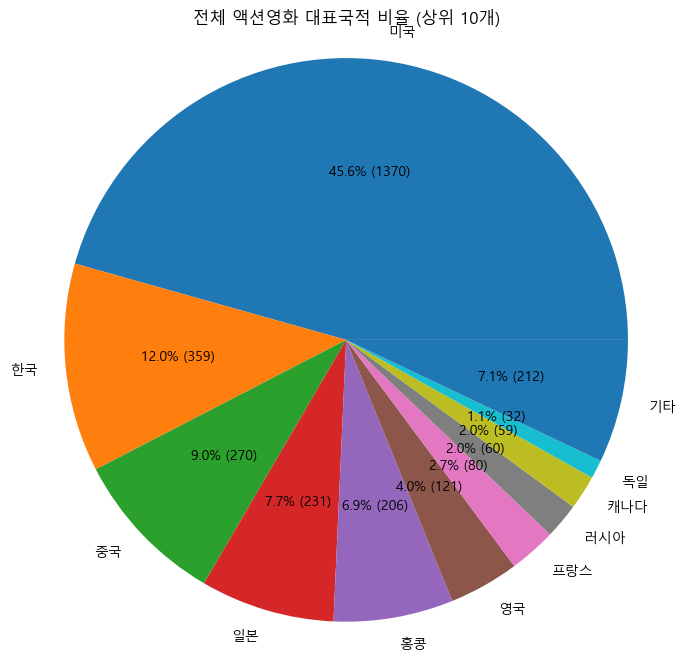

In [15]:
n_categories = 10  # 표시할 범주 개수

act_mv_counts = all_act_mv['대표국적'].value_counts()
top_categories = act_mv_counts.head(n_categories)
other_category_count = act_mv_counts.sum() - top_categories.sum()
top_categories['기타'] = other_category_count

labels = top_categories.index.tolist()

plt.figure(figsize=(8, 8))
patches, _, autotexts = plt.pie(top_categories, labels=labels, autopct=lambda pct: f'{pct:.1f}% ({int(pct * sum(top_categories)/100)})')

plt.title('전체 액션영화 대표국적 비율 (상위 {}개)'.format(n_categories))
plt.axis('equal')

plt.show()

## - 상위 액션영화 대표국적 분포

In [16]:
top_act_mv['대표국적'].value_counts()

미국     196
한국     122
중국       4
프랑스      2
독일       1
영국       1
Name: 대표국적, dtype: int64

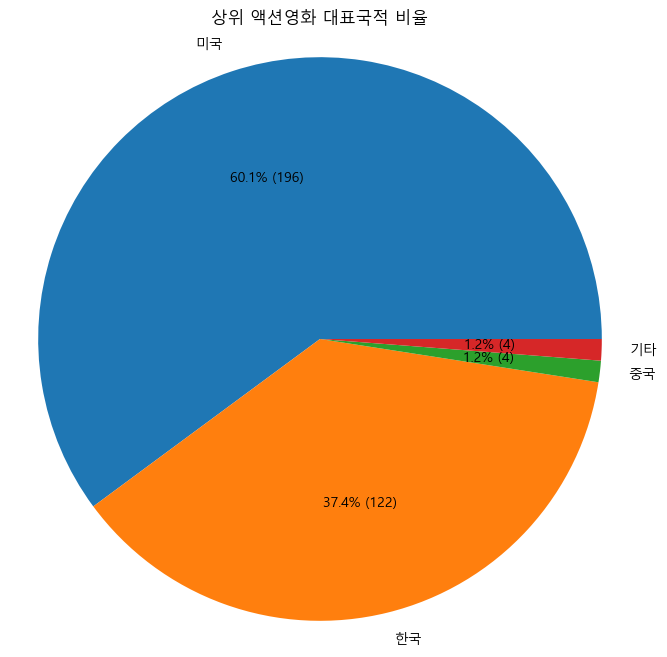

In [17]:
# 대표국적 값의 빈도수 계산
top_value_counts = top_act_mv['대표국적'].value_counts()

# 상위 범주 개수 설정
top_categories = 3  # 상위 3개 범주로 제한

# 상위 범주 이외의 값은 "기타"로 표시
top_value_counts = top_value_counts[:top_categories]
other_count = top_act_mv.shape[0] - top_value_counts.sum()
top_value_counts['기타'] = other_count

# 파이차트 그리기
plt.figure(figsize=(8, 8))
patches, _, autotexts = plt.pie(top_value_counts, labels=top_value_counts.index, autopct=lambda pct: f'{pct:.1f}% ({int(pct * sum(top_value_counts)/100+1)})')

plt.title('상위 액션영화 대표국적 비율')
plt.axis('equal')  # 파이차트를 원형으로 설정

# 그래프 출력
plt.show()

# 미국, 한국 액션영화 100만 관객 달성율

In [214]:
usa_act = round((196/1370)*100,2)
kor_act = round((122/359)*100,2)
print(f'미국 액션영화 100만 관객 달성율 : {usa_act}%\n한국 액션영화 100만 관객 달성율 : {kor_act}%')

미국 액션영화 100만 관객 달성율 : 14.31%
한국 액션영화 100만 관객 달성율 : 33.98%


# 액션영화 등급 분포

## - 전체 액션영화 등급 분포

In [18]:
all_act_mv['등급'].value_counts()

15세이상관람가                            1264
청소년관람불가                              675
12세이상관람가                             505
전체관람가                                125
15세관람가                                73
고등학생이상관람가                             70
12세관람가                                61
18세관람가                                44
중학생이상관람가                              31
연소자관람불가                               25
연소자관람가                                23
국민학생관람불가                              18
15세이상관람가,중학생이상관람가                      8
15세 미만인 자는 관람할 수 없는 등급                 8
고등학생이상관람가,15세이상관람가                     7
18세 미만인 자는 관람할 수 없는 등급                 6
연소자관람불가,청소년관람불가                        3
미성년자관람불가                               3
국민학생관람불가,15세이상관람가                      2
12세이상관람가,중학생이상관람가                      2
18세관람가,청소년관람불가                         2
연소자관람가,전체관람가                           1
고등학생이상관람가,청소년관람불가                      1
연소자관람가,15세이상관람가                        1
15세이상관람가,18세 미만인

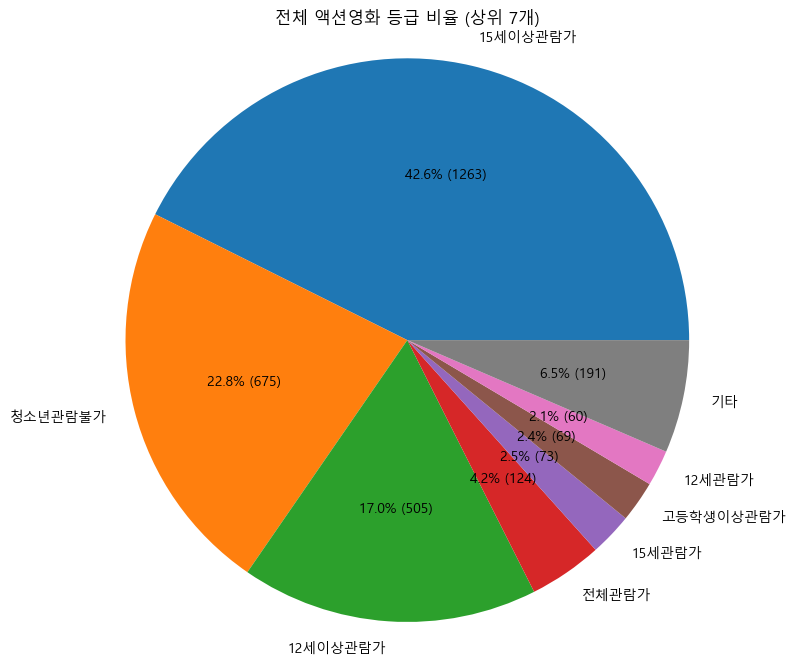

In [19]:
n_categories = 7  # 표시할 범주 개수

act_mv_counts = all_act_mv['등급'].value_counts()
top_categories = act_mv_counts.head(n_categories)
other_category_count = act_mv_counts.sum() - top_categories.sum()
top_categories['기타'] = other_category_count

labels = top_categories.index.tolist()

plt.figure(figsize=(8, 8))
patches, _, autotexts = plt.pie(top_categories, labels=labels, autopct=lambda pct: f'{pct:.1f}% ({int(pct * sum(top_categories)/100)})')

plt.title('전체 액션영화 등급 비율 (상위 {}개)'.format(n_categories))
plt.axis('equal')

plt.show()

## - 상위 액션영화 등급 분포

In [20]:
top_act_mv['등급'].value_counts()

15세이상관람가    128
12세이상관람가    124
청소년관람불가      34
전체관람가        18
15세관람가        9
12세관람가        8
18세관람가        5
Name: 등급, dtype: int64

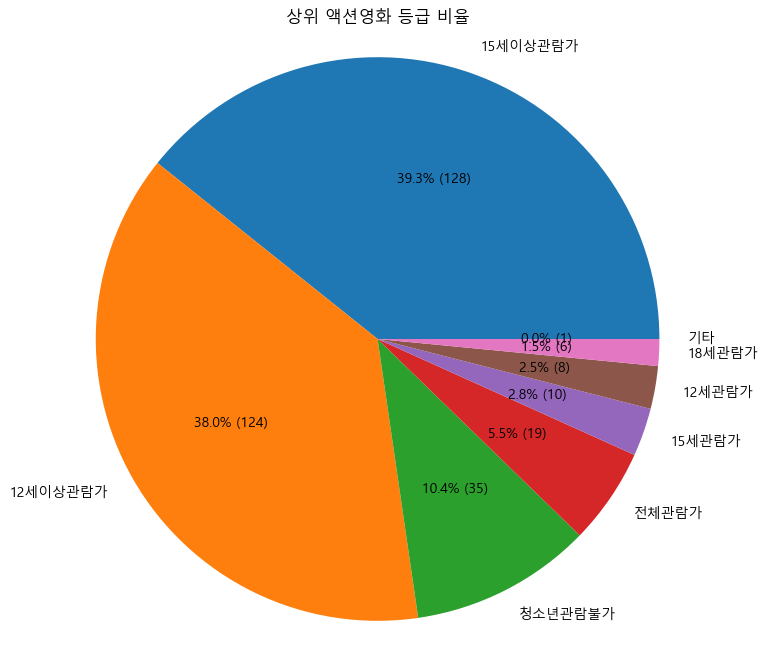

In [21]:
# 대표국적 값의 빈도수 계산
top_value_counts = top_act_mv['등급'].value_counts()

# 상위 범주 개수 설정
top_categories = 7  # 상위 3개 범주로 제한

# 상위 범주 이외의 값은 "기타"로 표시
top_value_counts = top_value_counts[:top_categories]
other_count = top_act_mv.shape[0] - top_value_counts.sum()
top_value_counts['기타'] = other_count

# 파이차트 그리기
plt.figure(figsize=(8, 8))
patches, _, autotexts = plt.pie(top_value_counts, labels=top_value_counts.index, autopct=lambda pct: f'{pct:.1f}% ({int(pct * sum(top_value_counts)/100+1)})')

plt.title('상위 액션영화 등급 비율')
plt.axis('equal')  # 파이차트를 원형으로 설정

# 그래프 출력
plt.show()

In [22]:
top_act_mv

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
5770,25,바람의 파이터,2004-08-12,12세관람가,액션,한국,한국,아이비젼엔터테인먼트(주),영화사청어람(주),양윤호,"양동근,히라야마 아야,허명행,정두홍,송혁재,주경탁,김대우,김규현,이호식,김순재,김영...",2004-10-09,0,9158945500,0,1442299,1,1
7731,33,연인,2004-09-10,12세관람가,"멜로/로맨스,액션",중국,중국,"에드코필름,장예모 스튜디오",쇼이스트(주),장예모,"금성무,유덕화,장쯔이",2004-12-16,0,6644463500,0,1027354,1,1
10789,35,콘스탄틴,2005-02-08,15세관람가,"드라마,액션,스릴러,판타지",미국,미국,워너 브러더스 픽쳐스,워너브러더스 코리아(주),프란시스 로렌스,"키아누 리브스,레이첼 와이즈,시아 라뵈프",2005-03-30,32500,11164582000,5,1736163,1,1
15961,45,미스터 & 미세스 스미스,2005-06-16,15세관람가,"멜로/로맨스,액션,어드벤처,스릴러",미국,미국,뉴리전시 픽쳐스,이십세기폭스필름코퍼레이션,더그 라이만,"안젤리나 졸리,브래드 피트,빈스 본",2005-09-06,15000,18900071500,3,2963193,1,2
16704,26,아일랜드,2005-07-21,12세관람가,"SF,드라마,액션,스릴러",미국,미국,"드림웍스 SKG,워너 브러더스 픽쳐스",워너브러더스 코리아(주),마이클 베이,이완 맥그리거,2005-09-29,0,20363994500,0,3218811,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
481786,42,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-12-20,450000,135758658810,75,17615919,2,2
482365,21,한산: 용의 출현,2022-07-27,12세이상관람가,"액션,드라마",한국,한국,(주)빅스톤픽쳐스,롯데컬처웍스(주)롯데엔터테인먼트,김한민,"박해일,이지영,이정태,변요한,안성기,손현주,김성규,김성균,김향기,옥택연,공명,박지환...",2022-12-27,2086000,73700628377,288,7264934,2,2
482368,18,외계+인 1부,2022-07-20,12세이상관람가,"액션,판타지,SF",한국,한국,(주)케이퍼필름,(주)씨제이이엔엠,최동훈,"류준열,김우빈,김태리,소지섭,염정아,조우진,김의성,이하늬,신정근,이시훈,김대명,최유...",2022-12-27,3177000,15995553548,353,1539362,2,2
482666,73,블랙 팬서: 와칸다 포에버,2022-11-09,12세이상관람가,"액션,어드벤처,드라마",미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,라이언 쿠글러,"레티티아 라이트,루피타 뇽오,다네이 거라이라,마틴 프리먼,다니엘 칼루야,안젤라 바셋...",2022-12-31,102000,22203069405,8,2105641,1,1


In [23]:
all_act_mv[all_act_mv['영화명'] == '아일랜드']

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
16704,26,아일랜드,2005-07-21,12세관람가,"SF,드라마,액션,스릴러",미국,미국,"드림웍스 SKG,워너 브러더스 픽쳐스",워너브러더스 코리아(주),마이클 베이,이완 맥그리거,2005-09-29,0,20363994500,0,3218811,1,4


In [24]:
all_act_mv['감독'].value_counts()

류신의            17
서극             14
오우삼            13
마크 앳킨스         11
제임스 카메론        11
               ..
사스가 사스케         1
마이클 알메레이다       1
숀 맥나마라          1
마이클 S. 오헤이다     1
황인호             1
Name: 감독, Length: 1742, dtype: int64

In [25]:
top_act_mv['감독'].value_counts()

마이클 베이        6
류승완           5
J.J. 에이브럼스    4
최동훈           4
크리스토퍼 놀란      4
             ..
박홍수           1
노암 머로         1
자움 콜렛 세라      1
루퍼트 와이어트      1
조지 밀러         1
Name: 감독, Length: 215, dtype: int64

# 상위 한국 액션 영화

In [64]:
kor_top_act_mv = top_act_mv[top_act_mv['대표국적'] == '한국']
kor_top_act_mv

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
5770,25,바람의 파이터,2004-08-12,12세관람가,액션,한국,한국,아이비젼엔터테인먼트(주),영화사청어람(주),양윤호,"양동근,히라야마 아야,허명행,정두홍,송혁재,주경탁,김대우,김규현,이호식,김순재,김영...",2004-10-09,0,9158945500,0,1442299,1,1
20981,23,태풍,2005-12-14,15세관람가,"드라마,액션",한국,한국,CJ ENM,CJ ENM,곽경택,"김혜정,김원진,이정재,이미연,추현경,장동건,허욱,신성일,김형찬,홍의정,김이호,나수원...",2006-02-09,750000,22209675300,30,3471150,1,1
21556,35,미스터 소크라테스,2005-11-10,18세관람가,액션,한국,한국,"㈜커리지필름,(주)오죤필름",롯데쇼핑㈜롯데엔터테인먼트,최진원,"김래원,강신일,이종혁,윤태영,박성웅,정욱,이주호,성기완,임종궁,윤서현,오일용",2006-02-27,0,6765653000,0,1066103,1,1
22476,34,구세주,2006-02-16,15세관람가,"코미디,액션,멜로/로맨스",한국,한국,㈜익영영화,쇼이스트(주),김정우,"최성국,신이,김수미,박준규,이상현,강민서,김장호,장정미,김영휘,조승연,백일섭,이원종...",2006-03-24,0,10087308700,0,1621131,1,1
23210,35,잠복근무,2005-03-17,15세관람가,"코미디,액션",한국,한국,"(주)마인엔터테인먼트 ,시리우스픽쳐스(주)",(주)쇼박스,박광춘,"김원진,공유,김선아,하정우,이범수,남상미,강경희,김회근,신경하,김명조,홍수아,박우규...",2006-04-12,55000,9590663500,11,1533225,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479489,83,공조2: 인터내셔날,2022-09-07,15세이상관람가,"액션,코미디",한국,한국,"(주)제이케이필름,(주)씨제이이엔엠",(주)씨제이이엔엠,이석훈,"현빈,유해진,임윤아,다니엘 헤니,진선규,장영남,박훈,임성재,윤상화,박민하,전국환,전...",2022-11-29,69000,70916352586,11,6982840,4,4
479778,51,암살,2015-07-22,15세이상관람가,"액션,드라마",한국,한국,(주)케이퍼필름,(주)쇼박스,최동훈,"전지현,이정재,하정우,오달수,조진웅,이경영,최덕문,김의성,박병은,김홍파,강용빈,홍성...",2022-12-01,652000,98469385781,92,12706947,1,1
481786,42,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-12-20,450000,135758658810,75,17615919,2,2
482365,21,한산: 용의 출현,2022-07-27,12세이상관람가,"액션,드라마",한국,한국,(주)빅스톤픽쳐스,롯데컬처웍스(주)롯데엔터테인먼트,김한민,"박해일,이지영,이정태,변요한,안성기,손현주,김성규,김성균,김향기,옥택연,공명,박지환...",2022-12-27,2086000,73700628377,288,7264934,2,2


# 상위 한국 액션영화 감독

In [65]:
# del kor_all_act_mv_dir_list

In [66]:
# 상위 한국 액션영화 감독명 리스트화
kor_top_act_mv_dir_list = []
kor_top_act_mv_dir = kor_top_act_mv['감독'].unique().tolist()
for i in range(len(kor_top_act_mv_dir)):
    kor_top_act_mv_dir_list.extend(kor_top_act_mv_dir[i].split(','))

kor_top_act_mv_dir_list

['양윤호',
 '곽경택',
 '최진원',
 '김정우',
 '박광춘',
 '최호',
 '강우석',
 '조동오',
 '조진규',
 '장진',
 '강석범',
 '유하',
 '이상기',
 '정용기',
 '심형래',
 '곽경택',
 '안권태',
 '나홍진',
 '장훈',
 '김동원',
 '박희곤',
 '신정원',
 '이연우',
 '신태라',
 '김용화',
 '강효진',
 '송해성',
 '김석윤',
 '김지훈',
 '조범구',
 '황병국',
 '강제규',
 '김유진',
 '임상윤',
 '우민호',
 '조근현',
 '정병길',
 '류승완',
 '김성수',
 '안권태',
 '박홍수',
 '원신연',
 '김홍선',
 '김지운',
 '최동훈',
 '김봉주',
 '허종호',
 '이승준',
 '조의석',
 '문현성',
 '창',
 '김주환',
 '강윤성',
 '박훈정',
 '한상호',
 '김민호',
 '김광식',
 '김병우',
 '조성희',
 '조의석',
 '김병서',
 '이준익',
 '정다원',
 '김한민',
 '손용호',
 '리건',
 '김성훈',
 '봉준호',
 '최원섭',
 '양우석',
 '나현',
 '박광현',
 '장준환',
 '이정범',
 '이해영',
 '필감성',
 '장철수',
 '이원태',
 '한준희',
 '김정훈',
 '윤제균',
 '윤종빈',
 '이철하',
 '김선',
 '김곡',
 '홍원찬',
 '연상호',
 '이상용',
 '이정재',
 '이상근',
 '이석훈']

In [67]:
# 상위 한국 액션영화 감독수(공동 제작 미포함)
len(kor_top_act_mv_dir_list)

91

In [68]:
# 상위 한국 액션영화 감독수(공동 제자가 포함)
kor_top_act_mv['감독'].value_counts()

류승완    5
최동훈    4
박훈정    3
곽경택    3
김한민    3
      ..
허종호    1
이승준    1
조의석    1
문현성    1
이석훈    1
Name: 감독, Length: 88, dtype: int64

# 전체 한국 액션영화 감독

In [69]:
# 전체 액션영화
all_act_mv

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
216,13,싸이퍼,2003-11-28,15세관람가,"스릴러,액션",미국,미국,NaN,(주)오시네마,빈센조 나탈리,"제레미 노담,루시 루",2003-12-03,711500,9910000,113,1579,1,4
400,13,호미사이드,2003-12-12,15세관람가,"액션,범죄,코미디",미국,미국,콜럼비아트라이스타,콜럼비아트라이스타,론 쉘톤,"해리슨 포드,조쉬 하트넷",2003-12-16,771500,13968000,119,2067,1,4
505,7,루니 툰 : 백 인 액션,2003-12-24,전체관람가,"액션,어드벤처",미국,미국,NaN,워너브러더스 코리아(주),조 단테,"브렌든 프레이저,제나 엘프만,티모시 달튼",2003-12-29,775500,6840500,124,1079,1,4
514,7,스노우 보더,2003-12-24,15세관람가,액션,프랑스,"프랑스,미국",NaN,쇼이스트(주),올리아스 바르코,"니콜라스 뒤보셸,그레고리 콜린",2003-12-30,3308500,29847000,501,4552,1,9
629,11,매트릭스3 레볼루션,2003-11-05,15세관람가,"SF,액션,범죄",미국,미국,NaN,워너브러더스 코리아(주),"릴리 워쇼스키,라나 워쇼스키","키아누 리브스,로렌스 피쉬번,캐리 앤 모스",2004-01-15,0,357720500,0,50543,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482707,42,극장판 가면라이더: 세이버X젠카이저 슈퍼히어로 전기,2022-12-01,전체관람가,"액션,어드벤처",일본,일본,NaN,트윈플러스파트너스(주),타자키 류타,NaN,2022-12-31,250000,53611179,50,6471,5,5
482710,20,에브리씽 에브리웨어 올 앳 원스,2022-10-12,15세이상관람가,"액션,코미디",미국,미국,NaN,워터홀컴퍼니(주),"다니엘 콴,다니엘 쉐이너트","양자경,스테파니 수,키 호이 콴,제이미 리 커티스",2022-12-31,3842100,3787226770,413,356048,7,11
482729,1,아바타: 물의 길,2022-12-14,12세이상관람가,"액션,어드벤처,SF,스릴러",미국,미국,NaN,월트디즈니컴퍼니코리아 유한책임회사,제임스 카메론,"조 샐다나,샘 워싱턴,시고니 위버,스티븐 랭,케이트 윈슬렛",2022-12-31,6574092724,90296839202,515281,7313149,2050,7454
482739,42,데시벨,2022-11-16,12세이상관람가,액션,한국,한국,"이스트드림시노펙스(주),(주)기억속의매미",(주)마인드마크,황인호,"김래원,임병훈,정상훈,이종석,박병은,이상희,김정우,나현우,박성훈,조인우,이종욱,박진...",2022-12-31,250000,8846169146,50,900654,5,5


In [70]:
# 전체 한국 액션영화
kor_all_act_mv = all_act_mv[all_act_mv['대표국적'] == '한국']
kor_all_act_mv

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
636,11,천년호,2003-11-28,15세관람가,"멜로/로맨스,액션,판타지",한국,한국,한맥영화(주),(주)시네마서비스,이광훈,"정준호,김효진,김혜리,최원석,강신일,박동빈",2004-01-15,0,159310500,0,25292,1,4
3018,19,클레멘타인,2004-05-21,15세관람가,액션,한국,한국,펄스타 픽쳐스,(주)엔터모드,김두영,"이동준,스티븐 시걸,은서우,김혜리,손철,윤현숙,윤현정,김규민,김희찬,김병채,김봉준,...",2004-06-09,0,22983000,0,3562,1,1
3246,18,3인조,1997-05-24,연소자관람불가,"액션,코미디",한국,한국,(주)씨네이천,NaN,박찬욱,"이경영,김민종,정선경,도금봉,김부선,김성미,이인철,이기열,안길강",2004-06-21,18000,120000,3,20,1,1
5770,25,바람의 파이터,2004-08-12,12세관람가,액션,한국,한국,아이비젼엔터테인먼트(주),영화사청어람(주),양윤호,"양동근,히라야마 아야,허명행,정두홍,송혁재,주경탁,김대우,김규현,이호식,김순재,김영...",2004-10-09,0,9158945500,0,1442299,1,1
15124,26,그리스 로마신화 - 올림포스 가디언 - 기간테스 대역습,2005-07-28,전체관람가,액션,한국,한국,"지엔지엔터테인먼트,(주)가나미디어","(주)스폰지이엔티,스폰지",김준,"손원일,라용원,윤성혜,이한나,이정구",2005-08-17,62000,120106500,11,21177,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482365,21,한산: 용의 출현,2022-07-27,12세이상관람가,"액션,드라마",한국,한국,(주)빅스톤픽쳐스,롯데컬처웍스(주)롯데엔터테인먼트,김한민,"박해일,이지영,이정태,변요한,안성기,손현주,김성규,김성균,김향기,옥택연,공명,박지환...",2022-12-27,2086000,73700628377,288,7264934,2,2
482368,18,외계+인 1부,2022-07-20,12세이상관람가,"액션,판타지,SF",한국,한국,(주)케이퍼필름,(주)씨제이이엔엠,최동훈,"류준열,김우빈,김태리,소지섭,염정아,조우진,김의성,이하늬,신정근,이시훈,김대명,최유...",2022-12-27,3177000,15995553548,353,1539362,2,2
482535,79,일진 3,2022-06-25,청소년관람불가,액션,한국,한국,"(주)컨텐츠 빌리지,㈜리필름",(주)드림팩트엔터테인먼트,이수성,"이승용,변준우,송민경,지웅배",2022-12-29,30000,50000,3,5,1,1
482597,55,크리스마스 캐럴,2022-12-07,청소년관람불가,"드라마,액션",한국,한국,"(주)화인컷,(주)블루플랜잇",(주)디스테이션,김성수,"진영,김영민,김동휘,송건희,허동원,황인성,서진원,김정진,하회정,하헌진,이슬기,양상운...",2022-12-30,50000,227011380,10,24235,1,1


In [71]:
# 전체 한국 액션영화 감독명 리스트화
kor_all_act_mv_dir_list = []
kor_all_act_mv_dir = kor_all_act_mv['감독'].unique().tolist()
for i in range(len(kor_all_act_mv_dir)):
    kor_all_act_mv_dir_list.extend(kor_all_act_mv_dir[i].split(','))

kor_all_act_mv_dir_list

['이광훈',
 '김두영',
 '박찬욱',
 '양윤호',
 '김준',
 '민준기',
 '이인수',
 '사이토 코이치',
 '곽경택',
 '손희창',
 '최진원',
 '김정우',
 '박광춘',
 '최호',
 '조범구',
 '조민호',
 '박철희',
 '강우석',
 '정흥순',
 '조동오',
 '조진규',
 '장진',
 '강석범',
 '최양일',
 '박기형',
 '김현수',
 '김영준',
 '심승보',
 '유하',
 '마이클 강',
 '한재림',
 '이상기',
 '정용기',
 '심형래',
 '배창호',
 '김종현',
 '곽재용',
 '김진성',
 '김유진',
 '곽경택',
 '안권태',
 '박희준',
 '나홍진',
 '배형준',
 '류승완',
 '장훈',
 '김동원',
 '윤종석',
 '김영남',
 '여명준',
 '여균동',
 '박희곤',
 '신정원',
 '박지원',
 '이연우',
 '신태라',
 '김용화',
 '박정훈',
 '전용택',
 '김상진',
 '권호영',
 '강효진',
 '이성한',
 '조명남',
 '송해성',
 '이두용',
 '김석윤',
 '전만배',
 '이세영',
 '조운',
 '임찬익',
 '김지훈',
 '신동엽',
 '황유식',
 '김성수',
 '김한민',
 '이현승',
 '프라챠 핀카엡',
 '이종석',
 '황병국',
 '오영두',
 '강제규',
 '박철관',
 '김영빈',
 '지하진',
 '고명안',
 '임상윤',
 '우민호',
 '조근현',
 '정병길',
 '장철수',
 '임권택',
 '안권태',
 '박홍수',
 '박제현',
 '조병옥',
 '이주형',
 '최원경',
 '김도경',
 '정영헌',
 '박상준',
 '고영남',
 '이정범',
 '이준익',
 '원신연',
 '이원우',
 '정창화',
 '황풍',
 '김홍선',
 '김청기',
 '전규환',
 '임상수',
 '박상현',
 '노병하',
 '키리야 카즈아키',
 '김지운',
 '조세래',
 '박흥식',
 '최동훈',
 '김봉주',
 '허종호',
 '방현준',
 '오인천',
 '오영두',


In [72]:
# 전체 한국 액션영화 감독수(공동 제작 포함)
len(kor_all_act_mv_dir_list)

265

In [73]:
# 전체 한국 액션영화 감독수(공동 제작 미포함)
kor_all_act_mv['감독'].value_counts()

류승완         9
김성수         8
이수성         8
강우석         6
임권택         6
           ..
김청기         1
임상수         1
박상현         1
키리야 카즈아키    1
황인호         1
Name: 감독, Length: 253, dtype: int64

# 전체 한국 액션영화 감독 중_총 작품수 대비 100만 이상 작품수 비율

In [74]:
# 감독별 100만 이상 작품수
director_top_counts = kor_top_act_mv['감독'].value_counts()
kor_top_act_mv_dir_df = pd.DataFrame({'감독명': director_top_counts.index, '100만 이상 작품수': director_top_counts.values})
kor_top_act_mv_dir_df

,감독명,100만 이상 작품수
0,류승완,5
1,최동훈,4
2,박훈정,3
3,곽경택,3
4,김한민,3
...,...,...
83,허종호,1
84,이승준,1
85,조의석,1
86,문현성,1


In [75]:
# 감독별 총 작품수
director_all_counts = kor_all_act_mv['감독'].value_counts()
kor_all_act_mv_dir_df = pd.DataFrame({'감독명': director_all_counts.index, '총 작품수': director_all_counts.values})
kor_all_act_mv_dir_df

,감독명,총 작품수
0,류승완,9
1,김성수,8
2,이수성,8
3,강우석,6
4,임권택,6
...,...,...
248,김청기,1
249,임상수,1
250,박상현,1
251,키리야 카즈아키,1


# 감독명 기준_총 작품수, 100만 이상 작품수 합치기

In [76]:
# Left Join
kor_act_mv_dir_df = kor_all_act_mv_dir_df.merge(kor_top_act_mv_dir_df, on='감독명', how='left')

# NaN 값을 0으로 대체
kor_act_mv_dir_df['100만 이상 작품수'] = kor_act_mv_dir_df['100만 이상 작품수'].fillna(0)

# 데이터 타입을 정수로 변경
kor_act_mv_dir_df['100만 이상 작품수'] = kor_act_mv_dir_df['100만 이상 작품수'].astype(int)

kor_act_mv_dir_df.sort_values('100만 이상 작품수', ascending=False, inplace=True)
kor_act_mv_dir_df

,감독명,총 작품수,100만 이상 작품수
0,류승완,9,5
9,최동훈,4,4
3,강우석,6,3
5,김한민,5,3
8,박훈정,4,3
...,...,...,...
121,박동기,1,0
123,임진순,1,0
124,김상민,1,0
125,천명관,1,0


In [77]:
kor_act_mv_dir_df['총 작품수 대비 100만 이상 작품수 비율'] =  round(kor_act_mv_dir_df['100만 이상 작품수'] / kor_act_mv_dir_df['총 작품수'] * 100,2)

In [78]:
kor_act_mv_dir_df = kor_act_mv_dir_df.sort_values(['100만 이상 작품수', '총 작품수 대비 100만 이상 작품수 비율'], ascending=[False, False])
kor_act_mv_dir_df.head(20)

,감독명,총 작품수,100만 이상 작품수,총 작품수 대비 100만 이상 작품수 비율
0,류승완,9,5,55.56
9,최동훈,4,4,100.00
19,김성훈,3,3,100.00
21,곽경택,3,3,100.00
8,박훈정,4,3,75.00
11,김지운,4,3,75.00
5,김한민,5,3,60.00
3,강우석,6,3,50.00
49,최호,2,2,100.00
47,조동오,2,2,100.00


# 전체 한국 액션 영화 배우

In [82]:
all_act_actor = []
for i in range(len(kor_all_act_mv)):
    try:
        all_add_actor = kor_all_act_mv['배우 '].iloc[i].split(',')
        all_act_actor.extend(all_add_actor)
    except:
        continue
all_act_actor

['정준호',
 '김효진',
 '김혜리',
 '최원석',
 '강신일',
 '박동빈',
 '이동준',
 '스티븐 시걸',
 '은서우',
 '김혜리',
 '손철',
 '윤현숙',
 '윤현정',
 '김규민',
 '김희찬',
 '김병채',
 '김봉준',
 '김성남',
 '최영웅',
 '이승윤',
 '이영환',
 '김영문',
 '임호',
 '기주봉',
 '임혁필',
 '전원주',
 '최윤슬',
 '이경영',
 '김민종',
 '정선경',
 '도금봉',
 '김부선',
 '김성미',
 '이인철',
 '이기열',
 '안길강',
 '양동근',
 '히라야마 아야',
 '허명행',
 '정두홍',
 '송혁재',
 '주경탁',
 '김대우',
 '김규현',
 '이호식',
 '김순재',
 '김영주',
 '양길영',
 '이경원',
 '정태우',
 '이한솔',
 '염혜란',
 '한이진',
 '손원일',
 '라용원',
 '윤성혜',
 '이한나',
 '이정구',
 '박중훈',
 '최경원',
 '황정민',
 '김승우',
 '공효진',
 '김응수',
 '박완규',
 '신선영',
 '안희철',
 '조용식',
 '안미정',
 '김병선',
 '이동석',
 '서의석',
 '차상민',
 '민준기',
 '박병권',
 '김승철',
 '김용',
 '김태엽',
 '김수용',
 '권일수',
 '김병춘',
 '김수현',
 '이한솔',
 '원근희',
 '오일용',
 '안재모',
 '고정일',
 '임유진',
 '강기재',
 '김형진',
 '이상민',
 '안정동',
 '김상우',
 '최광민',
 '이사라',
 '김재원',
 '김예진',
 '나영희',
 '윤유선',
 '오쿠다 에이지',
 '김혜정',
 '김원진',
 '이정재',
 '이미연',
 '추현경',
 '장동건',
 '허욱',
 '신성일',
 '김형찬',
 '홍의정',
 '김이호',
 '나수원',
 '박태호',
 '김경환',
 '김상용',
 '민성주',
 '민지환',
 '박광설',
 '유승권',
 '박병렬',
 '김철준',
 '이주헌',
 '이성근',
 '최일화',
 

In [83]:
# 전체 한국 액션 배우
# 값들의 빈도수 계산
all_value_counts = Counter(all_act_actor)

# 결과 출력
print(all_value_counts)

Counter({'곽진석': 22, '이경영': 20, '김수현': 19, '이정현': 19, '안성기': 18, '조재윤': 18, '정만식': 17, '조진웅': 17, '이정민': 16, '임용순': 16, '황정민': 15, '박성웅': 15, '정우성': 15, '신유람': 15, '박진우': 15, '정인기': 15, '김병옥': 14, '공정환': 14, '유해진': 14, '안성봉': 14, '안길강': 13, '김태훈': 13, '최진호': 13, '권태원': 13, '지대한': 13, '송영창': 13, '마동석': 13, '한이진': 12, '이정재': 12, '홍의정': 12, '신정근': 12, '주석태': 12, '주진모': 12, '김준배': 12, '김기천': 12, '이동진': 12, '이주원': 12, '현봉식': 12, '서문호': 12, '김응수': 11, '김원진': 11, '박병렬': 11, '조운': 11, '하정우': 11, '유재명': 11, '오달수': 11, '윤제문': 11, '손병호': 11, '고창석': 11, '김강일': 11, '박지훈': 11, '서현우': 11, '장광': 11, '김의성': 11, '김태준': 11, '박지환': 11, '이성민': 11, '기주봉': 10, '이상민': 10, '이원종': 10, '장준녕': 10, '이한위': 10, '박상욱': 10, '이상훈': 10, '성동일': 10, '박병은': 10, '김희원': 10, '김원중': 10, '최정현': 10, '이준혁': 10, '박태산': 10, '안효민': 10, '조우진': 10, '허명행': 9, '손병욱': 9, '류승범': 9, '유승목': 9, '최홍일': 9, '장영남': 9, '송강호': 9, '김현우': 9, '유하복': 9, '염동헌': 9, '이재용': 9, '김서원': 9, '손현주': 9, '유정호': 9, '김성균': 9, '최현종': 9, '강덕중': 9, '김한솔': 9, '강신일': 8, 

In [84]:
kor_top_act_mv

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
5770,25,바람의 파이터,2004-08-12,12세관람가,액션,한국,한국,아이비젼엔터테인먼트(주),영화사청어람(주),양윤호,"양동근,히라야마 아야,허명행,정두홍,송혁재,주경탁,김대우,김규현,이호식,김순재,김영...",2004-10-09,0,9158945500,0,1442299,1,1
20981,23,태풍,2005-12-14,15세관람가,"드라마,액션",한국,한국,CJ ENM,CJ ENM,곽경택,"김혜정,김원진,이정재,이미연,추현경,장동건,허욱,신성일,김형찬,홍의정,김이호,나수원...",2006-02-09,750000,22209675300,30,3471150,1,1
21556,35,미스터 소크라테스,2005-11-10,18세관람가,액션,한국,한국,"㈜커리지필름,(주)오죤필름",롯데쇼핑㈜롯데엔터테인먼트,최진원,"김래원,강신일,이종혁,윤태영,박성웅,정욱,이주호,성기완,임종궁,윤서현,오일용",2006-02-27,0,6765653000,0,1066103,1,1
22476,34,구세주,2006-02-16,15세관람가,"코미디,액션,멜로/로맨스",한국,한국,㈜익영영화,쇼이스트(주),김정우,"최성국,신이,김수미,박준규,이상현,강민서,김장호,장정미,김영휘,조승연,백일섭,이원종...",2006-03-24,0,10087308700,0,1621131,1,1
23210,35,잠복근무,2005-03-17,15세관람가,"코미디,액션",한국,한국,"(주)마인엔터테인먼트 ,시리우스픽쳐스(주)",(주)쇼박스,박광춘,"김원진,공유,김선아,하정우,이범수,남상미,강경희,김회근,신경하,김명조,홍수아,박우규...",2006-04-12,55000,9590663500,11,1533225,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
479489,83,공조2: 인터내셔날,2022-09-07,15세이상관람가,"액션,코미디",한국,한국,"(주)제이케이필름,(주)씨제이이엔엠",(주)씨제이이엔엠,이석훈,"현빈,유해진,임윤아,다니엘 헤니,진선규,장영남,박훈,임성재,윤상화,박민하,전국환,전...",2022-11-29,69000,70916352586,11,6982840,4,4
479778,51,암살,2015-07-22,15세이상관람가,"액션,드라마",한국,한국,(주)케이퍼필름,(주)쇼박스,최동훈,"전지현,이정재,하정우,오달수,조진웅,이경영,최덕문,김의성,박병은,김홍파,강용빈,홍성...",2022-12-01,652000,98469385781,92,12706947,1,1
481786,42,명량,2014-07-30,15세이상관람가,"사극,액션",한국,한국,(주)빅스톤픽쳐스,(주)씨제이이엔엠,김한민,"최민식,류승룡,조진웅,김명곤,진구,이정현,권율,노민우,이승준,오타니 료헤이,박보검,...",2022-12-20,450000,135758658810,75,17615919,2,2
482365,21,한산: 용의 출현,2022-07-27,12세이상관람가,"액션,드라마",한국,한국,(주)빅스톤픽쳐스,롯데컬처웍스(주)롯데엔터테인먼트,김한민,"박해일,이지영,이정태,변요한,안성기,손현주,김성규,김성균,김향기,옥택연,공명,박지환...",2022-12-27,2086000,73700628377,288,7264934,2,2


In [85]:
all_value_counts = Counter(all_act_actor)
all_value_counts_df = pd.DataFrame.from_dict(all_value_counts, orient='index', columns=['총 출연 작품수'])
all_value_counts_df = all_value_counts_df.reset_index().rename(columns={'index': '배우명'})
all_value_counts_df = all_value_counts_df.sort_values(by='총 출연 작품수', ascending=False).reset_index(drop=True)
all_value_counts_df

,배우명,총 출연 작품수
0,곽진석,22
1,이경영,20
2,이정현,19
3,김수현,19
4,조재윤,18
...,...,...
6090,전형준,1
6091,최선호,1
6092,이한성,1
6093,곽정길,1


# 상위 한국 액션 영화 배우

In [86]:
kor_all_act_mv

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
636,11,천년호,2003-11-28,15세관람가,"멜로/로맨스,액션,판타지",한국,한국,한맥영화(주),(주)시네마서비스,이광훈,"정준호,김효진,김혜리,최원석,강신일,박동빈",2004-01-15,0,159310500,0,25292,1,4
3018,19,클레멘타인,2004-05-21,15세관람가,액션,한국,한국,펄스타 픽쳐스,(주)엔터모드,김두영,"이동준,스티븐 시걸,은서우,김혜리,손철,윤현숙,윤현정,김규민,김희찬,김병채,김봉준,...",2004-06-09,0,22983000,0,3562,1,1
3246,18,3인조,1997-05-24,연소자관람불가,"액션,코미디",한국,한국,(주)씨네이천,NaN,박찬욱,"이경영,김민종,정선경,도금봉,김부선,김성미,이인철,이기열,안길강",2004-06-21,18000,120000,3,20,1,1
5770,25,바람의 파이터,2004-08-12,12세관람가,액션,한국,한국,아이비젼엔터테인먼트(주),영화사청어람(주),양윤호,"양동근,히라야마 아야,허명행,정두홍,송혁재,주경탁,김대우,김규현,이호식,김순재,김영...",2004-10-09,0,9158945500,0,1442299,1,1
15124,26,그리스 로마신화 - 올림포스 가디언 - 기간테스 대역습,2005-07-28,전체관람가,액션,한국,한국,"지엔지엔터테인먼트,(주)가나미디어","(주)스폰지이엔티,스폰지",김준,"손원일,라용원,윤성혜,이한나,이정구",2005-08-17,62000,120106500,11,21177,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
482365,21,한산: 용의 출현,2022-07-27,12세이상관람가,"액션,드라마",한국,한국,(주)빅스톤픽쳐스,롯데컬처웍스(주)롯데엔터테인먼트,김한민,"박해일,이지영,이정태,변요한,안성기,손현주,김성규,김성균,김향기,옥택연,공명,박지환...",2022-12-27,2086000,73700628377,288,7264934,2,2
482368,18,외계+인 1부,2022-07-20,12세이상관람가,"액션,판타지,SF",한국,한국,(주)케이퍼필름,(주)씨제이이엔엠,최동훈,"류준열,김우빈,김태리,소지섭,염정아,조우진,김의성,이하늬,신정근,이시훈,김대명,최유...",2022-12-27,3177000,15995553548,353,1539362,2,2
482535,79,일진 3,2022-06-25,청소년관람불가,액션,한국,한국,"(주)컨텐츠 빌리지,㈜리필름",(주)드림팩트엔터테인먼트,이수성,"이승용,변준우,송민경,지웅배",2022-12-29,30000,50000,3,5,1,1
482597,55,크리스마스 캐럴,2022-12-07,청소년관람불가,"드라마,액션",한국,한국,"(주)화인컷,(주)블루플랜잇",(주)디스테이션,김성수,"진영,김영민,김동휘,송건희,허동원,황인성,서진원,김정진,하회정,하헌진,이슬기,양상운...",2022-12-30,50000,227011380,10,24235,1,1


In [87]:
top_act_actor = []
for i in range(len(kor_top_act_mv)):
    top_add_actor = kor_top_act_mv['배우 '].iloc[i].split(',')
    top_act_actor.extend(top_add_actor)
top_act_actor

['양동근',
 '히라야마 아야',
 '허명행',
 '정두홍',
 '송혁재',
 '주경탁',
 '김대우',
 '김규현',
 '이호식',
 '김순재',
 '김영주',
 '양길영',
 '이경원',
 '정태우',
 '이한솔',
 '염혜란',
 '한이진',
 '김혜정',
 '김원진',
 '이정재',
 '이미연',
 '추현경',
 '장동건',
 '허욱',
 '신성일',
 '김형찬',
 '홍의정',
 '김이호',
 '나수원',
 '박태호',
 '김경환',
 '김상용',
 '민성주',
 '민지환',
 '박광설',
 '유승권',
 '박병렬',
 '김철준',
 '이주헌',
 '이성근',
 '최일화',
 '박찬영',
 '데이비드 맥기니스',
 '손병욱',
 '조운',
 '김래원',
 '강신일',
 '이종혁',
 '윤태영',
 '박성웅',
 '정욱',
 '이주호',
 '성기완',
 '임종궁',
 '윤서현',
 '오일용',
 '최성국',
 '신이',
 '김수미',
 '박준규',
 '이상현',
 '강민서',
 '김장호',
 '장정미',
 '김영휘',
 '조승연',
 '백일섭',
 '이원종',
 '신정근',
 '김광규',
 '김부선',
 '주석태',
 '김원진',
 '공유',
 '김선아',
 '하정우',
 '이범수',
 '남상미',
 '강경희',
 '김회근',
 '신경하',
 '김명조',
 '홍수아',
 '박우규',
 '김현진',
 '황의천',
 '나상문',
 '남경화',
 '조한영',
 '진수애',
 '김덕겸',
 '최미진',
 '장지영',
 '박상현',
 '윤지원',
 '정은미',
 '양은성',
 '김종명',
 '안형준',
 '김지숙',
 '김지우',
 '김상호',
 '박상면',
 '김선영',
 '정만식',
 '류승범',
 '황정민',
 '이수현',
 '김혜정',
 '박영수',
 '추자현',
 '민도기',
 '신영주',
 '김훈희',
 '조원식',
 '박정률',
 '김의석',
 '임효우',
 '변미선',
 '김근형',
 '김성기',
 '김인식',
 '박병철',
 '장진호',
 '전

In [88]:
# 상위 한국 액션 배우
# 값들의 빈도수 계산
top_value_counts = Counter(top_act_actor)

# 결과 출력
print(top_value_counts)

Counter({'정만식': 14, '이정민': 12, '박진우': 12, '신정근': 11, '황정민': 11, '곽진석': 11, '이경영': 11, '임용순': 11, '조재윤': 10, '김태준': 10, '마동석': 10, '안성봉': 10, '서문호': 10, '박성웅': 9, '주석태': 9, '하정우': 9, '김병옥': 9, '신유람': 9, '김기천': 9, '송영창': 9, '정인기': 9, '이동진': 9, '유해진': 9, '김의성': 9, '박지환': 9, '이주원': 9, '한이진': 8, '김원진': 8, '홍의정': 8, '박병렬': 8, '유재명': 8, '장준녕': 8, '정우성': 8, '주진모': 8, '김해숙': 8, '윤제문': 8, '조진웅': 8, '염동헌': 8, '오달수': 8, '김서원': 8, '김성균': 8, '강덕중': 8, '김한솔': 8, '이정재': 7, '조운': 7, '최진호': 7, '백동현': 7, '지대한': 7, '김수현': 7, '김윤석': 7, '공정환': 7, '이상민': 7, '김희원': 7, '유승목': 7, '정민성': 7, '박재홍': 7, '서현우': 7, '이정현': 7, '윤병희': 7, '조우진': 7, '김래원': 6, '김상호': 6, '안성기': 6, '권태원': 6, '장영남': 6, '진구': 6, '류성현': 6, '성동일': 6, '강동원': 6, '고창석': 6, '김강일': 6, '정종열': 6, '김태훈': 6, '박윤희': 6, '김민재': 6, '장광': 6, '김동영': 6, '이준혁': 6, '유정호': 6, '이성민': 6, '박지훈': 6, '권지훈': 6, '전배수': 6, '이성우': 6, '배유람': 6, '손성찬': 6, '허성태': 6, '홍기준': 6, '허명행': 5, '이한솔': 5, '김혜정': 5, '김철준': 5, '손병욱': 5, '강신일': 5, '이한위': 5, '류제승': 5, '최홍일': 5, '이해영': 5, '

In [89]:
top_value_counts = Counter(top_act_actor)
top_value_counts_df = pd.DataFrame.from_dict(top_value_counts, orient='index', columns=['100만 이상 작품 출연 수'])
top_value_counts_df = top_value_counts_df.reset_index().rename(columns={'index': '배우명'})
top_value_counts_df = top_value_counts_df.sort_values(by='100만 이상 작품 출연 수', ascending=False).reset_index(drop=True)
top_value_counts_df

,배우명,100만 이상 작품 출연 수
0,정만식,14
1,박진우,12
2,이정민,12
3,곽진석,11
4,황정민,11
...,...,...
3472,정준용,1
3473,김동휘,1
3474,신재승,1
3475,이준호,1


# 배우명 기준_총 출연 작품수, 100만 이상 작품 출연 수 합치기

In [90]:
# Left Join
kor_act_mv_act_df = all_value_counts_df.merge(top_value_counts_df, on='배우명', how='left')

# NaN 값을 0으로 대체
kor_act_mv_act_df['100만 이상 작품 출연 수'] = kor_act_mv_act_df['100만 이상 작품 출연 수'].fillna(0)

# 데이터 타입을 정수로 변경
kor_act_mv_act_df['100만 이상 작품 출연 수'] = kor_act_mv_act_df['100만 이상 작품 출연 수'].astype(int)

kor_act_mv_act_df.sort_values('100만 이상 작품 출연 수', ascending=False, inplace=True)
kor_act_mv_act_df

,배우명,총 출연 작품수,100만 이상 작품 출연 수
6,정만식,17,14
13,박진우,15,12
9,이정민,16,12
0,곽진석,22,11
1,이경영,20,11
...,...,...,...
3352,하회정,1,0
3353,하헌진,1,0
3354,이슬기,1,0
3355,양상운,1,0


In [216]:
kor_act_mv_act_df.head(25)

,배우명,총 출연 작품수,100만 이상 작품 출연 수,총 출연 작품수 대비 100만 이상 작품 출연수 비율
6,정만식,17,14,82.35
13,박진우,15,12,80.00
9,이정민,16,12,75.00
27,신정근,12,11,91.67
15,황정민,15,11,73.33
8,임용순,16,11,68.75
1,이경영,20,11,55.00
0,곽진석,22,11,50.00
39,김태준,11,10,90.91
33,서문호,12,10,83.33


In [91]:
kor_act_mv_act_df['총 출연 작품수 대비 100만 이상 작품 출연수 비율'] =  round(kor_act_mv_act_df['100만 이상 작품 출연 수'] / kor_act_mv_act_df['총 출연 작품수'] * 100,2)

In [92]:
kor_act_mv_act_df = kor_act_mv_act_df.sort_values(['100만 이상 작품 출연 수', '총 출연 작품수 대비 100만 이상 작품 출연수 비율'], ascending=[False, False])
kor_act_mv_act_df.head(30)

,배우명,총 출연 작품수,100만 이상 작품 출연 수,총 출연 작품수 대비 100만 이상 작품 출연수 비율
6,정만식,17,14,82.35
13,박진우,15,12,80.00
9,이정민,16,12,75.00
27,신정근,12,11,91.67
15,황정민,15,11,73.33
8,임용순,16,11,68.75
1,이경영,20,11,55.00
0,곽진석,22,11,50.00
39,김태준,11,10,90.91
33,서문호,12,10,83.33


# 감독별 선호 배우(top3)

In [79]:
favo_director_actor_df = pd.DataFrame(columns=['감독명', '선호 배우'])

cnt = 0
for i in range(len(kor_all_act_mv_dir_df)):
    favo_act_actor = []
    dir_name = kor_all_act_mv[kor_all_act_mv['감독'] == kor_act_mv_dir_df.iloc[i]['감독명']]

    try:
        for j in range(len(dir_name)):
            favo_add_actor = dir_name['배우 '].iloc[j].split(',')
            favo_act_actor.extend(favo_add_actor)
        favo_all_act = pd.Series(favo_act_actor)
        favo_top3_act = favo_all_act.value_counts().head(3).index.tolist()
        favo_director_actor_df.loc[cnt] = [kor_act_mv_dir_df.iloc[i]['감독명'], ', '.join(favo_top3_act)]
        cnt = cnt + 1
    except:
        continue

favo_director_actor_df.reset_index(drop=True, inplace=True)
favo_director_actor_df

,감독명,선호 배우
0,류승완,"안길강, 김수현, 류승범"
1,최동훈,"김해숙, 최덕문, 김수현"
2,김성훈,"현빈, 공정환, 김성준"
3,곽경택,"김혜정, 주진모, 김미진"
4,박훈정,"김다미, 김병옥, 최일화"
...,...,...
240,박동기,"윤주상, 김광재, 권혁천"
241,임진순,"마동석, 김새론, 서문호"
242,김상민,"서한결, 홍아름, 박 윤"
243,천명관,"정우, 김갑수"


# 기존 감독 데이터에 선호배우 합치기

In [80]:
kor_act_mv_dir_df = kor_act_mv_dir_df.merge(favo_director_actor_df, on='감독명', how='left')
kor_act_mv_dir_df

,감독명,총 작품수,100만 이상 작품수,총 작품수 대비 100만 이상 작품수 비율,선호 배우
0,류승완,9,5,55.56,"안길강, 김수현, 류승범"
1,최동훈,4,4,100.00,"김해숙, 최덕문, 김수현"
2,김성훈,3,3,100.00,"현빈, 공정환, 김성준"
3,곽경택,3,3,100.00,"김혜정, 주진모, 김미진"
4,박훈정,4,3,75.00,"김다미, 김병옥, 최일화"
...,...,...,...,...,...
248,박동기,1,0,0.00,"윤주상, 김광재, 권혁천"
249,임진순,1,0,0.00,"마동석, 김새론, 서문호"
250,김상민,1,0,0.00,"서한결, 홍아름, 박 윤"
251,천명관,1,0,0.00,"정우, 김갑수"


In [217]:
kor_act_mv_dir_df.head(20)

,감독명,총 작품수,100만 이상 작품수,총 작품수 대비 100만 이상 작품수 비율,선호 배우
0,류승완,9,5,55.56,"안길강, 김수현, 류승범"
1,최동훈,4,4,100.00,"김해숙, 최덕문, 김수현"
2,김성훈,3,3,100.00,"현빈, 공정환, 김성준"
3,곽경택,3,3,100.00,"김혜정, 주진모, 김미진"
4,박훈정,4,3,75.00,"김다미, 김병옥, 최일화"
5,김지운,4,3,75.00,"이병헌, 양도현, 이진한"
6,김한민,5,3,60.00,"박해일, 김강일, 오타니 료헤이"
7,강우석,6,3,50.00,"강신일, 강성진, 윤문식"
8,최호,2,2,100.00,"류승범, 장준녕, 이정재"
9,조동오,2,2,100.00,"박상욱, 정석용, 정우성"


# 개봉일 이전 매출 관련 영향 분석

In [93]:
# 상위 한국 액션 영화명 리스트화
kor_top_act_name = kor_top_act_mv['영화명'].tolist()
kor_top_act_name

['바람의 파이터',
 '태풍',
 '미스터 소크라테스',
 '구세주',
 '잠복근무',
 '사생결단',
 '한반도',
 '중천',
 '조폭마누라3',
 '거룩한 계보',
 '해바라기',
 '비열한 거리',
 '사랑',
 '무방비도시',
 '원스어폰어타임',
 '디워',
 '눈에는 눈 이에는 이',
 '추격자',
 '영화는 영화다',
 '유감스러운 도시',
 '인사동 스캔들',
 '차우',
 '거북이 달린다',
 '7급 공무원',
 '국가대표',
 '육혈포 강도단',
 '무적자',
 '황해',
 '조선명탐정 : 각시투구꽃의 비밀',
 '7광구',
 '퀵',
 '특수본',
 '마이 웨이',
 '신기전',
 '차형사',
 'R2B: 리턴투베이스',
 '회사원',
 '간첩',
 '26년',
 '강철중: 공공의 적 1-1',
 '내가 살인범이다',
 '짝패',
 '전설의 주먹',
 '런닝맨',
 '감기',
 '깡철이',
 '동창생',
 '친구 2',
 '용의자',
 '빅매치',
 '신의 한 수',
 '기술자들',
 '달콤한 인생',
 '전우치',
 '강남 1970',
 '더 폰',
 '성난 변호사',
 '밀정',
 '스파이',
 '마스터',
 '임금님의 사건수첩',
 '군함도',
 '표적',
 '청년경찰',
 '범죄도시',
 '마녀',
 '점박이:한반도의 공룡3D',
 '성난황소',
 '베를린',
 '안시성',
 'PMC: 더 벙커',
 '탐정 홍길동: 사라진 마을',
 '감시자들',
 '좋은 놈, 나쁜 놈, 이상한 놈',
 '의형제',
 '롱 리브 더 킹: 목포 영웅',
 '베테랑',
 '사자',
 '구르믈 버서난 달처럼',
 '걸캅스',
 '최종병기 활',
 '나쁜 녀석들: 더 무비',
 '신의 한 수: 귀수편',
 '창궐',
 '설국열차',
 '히트맨',
 '강철비',
 '도둑들',
 '끝까지 간다',
 '프리즌',
 '조작된 도시',
 '화이: 괴물을 삼킨 아이',
 '봉오동 전투',
 '아저씨',
 '악녀',
 '독전',
 '인질',
 '은밀하게 위대하게',

In [94]:
test = action_movies[action_movies['영화명'] == kor_top_act_name[10]]
test

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
31183,19,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-11-17,2202000,2202000,478,478,2,2
31362,18,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-11-21,1925000,4127000,350,828,6,6
31385,19,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-11-22,1450000,5577000,290,1118,5,5
31423,1,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-11-23,241012200,246589200,42208,43326,209,1203
31462,1,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-11-24,323881200,570470400,55607,98933,214,1293
31508,1,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-11-25,680603000,1251073400,109349,208282,239,1408
31538,1,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-11-26,686376200,1937449600,108652,316934,237,1324
31587,1,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-11-27,240373300,2177822900,40649,357583,220,1260
31623,1,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-11-28,254258200,2432081100,43900,401483,225,1280
31665,1,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-11-29,269565300,2701646400,46634,448117,224,1279


In [95]:
# 날짜 데이터 datetime형으로 변환
test['개봉일'] = pd.to_datetime(test['개봉일'])
test['기준일'] = pd.to_datetime(test['기준일'])

test

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
31183,19,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-11-17,2202000,2202000,478,478,2,2
31362,18,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-11-21,1925000,4127000,350,828,6,6
31385,19,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-11-22,1450000,5577000,290,1118,5,5
31423,1,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-11-23,241012200,246589200,42208,43326,209,1203
31462,1,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-11-24,323881200,570470400,55607,98933,214,1293
31508,1,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-11-25,680603000,1251073400,109349,208282,239,1408
31538,1,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-11-26,686376200,1937449600,108652,316934,237,1324
31587,1,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-11-27,240373300,2177822900,40649,357583,220,1260
31623,1,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-11-28,254258200,2432081100,43900,401483,225,1280
31665,1,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-11-29,269565300,2701646400,46634,448117,224,1279


# 개봉일 이전

In [96]:
# 개봉일 이전 데이터만 추출
before_test = test[test['기준일'] < test['개봉일']]
before_test

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
31183,19,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-11-17,2202000,2202000,478,478,2,2
31362,18,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-11-21,1925000,4127000,350,828,6,6
31385,19,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-11-22,1450000,5577000,290,1118,5,5


# 개봉일 이전 기간

In [97]:
before_open = (before_test['개봉일'].iloc[0] - before_test['기준일'].iloc[0]).days
before_open

6

# 개봉일 이전 누적매출액

In [98]:
before_open_sales = before_test['누적매출액'].iloc[-1]
before_open_sales

5577000

# 개봉일 이후

In [99]:
# 개봉일 이후 데이터만 추출
after_test = test[test['기준일'] >= test['개봉일']]
after_test

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
31423,1,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-11-23,241012200,246589200,42208,43326,209,1203
31462,1,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-11-24,323881200,570470400,55607,98933,214,1293
31508,1,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-11-25,680603000,1251073400,109349,208282,239,1408
31538,1,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-11-26,686376200,1937449600,108652,316934,237,1324
31587,1,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-11-27,240373300,2177822900,40649,357583,220,1260
31623,1,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-11-28,254258200,2432081100,43900,401483,225,1280
31665,1,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-11-29,269565300,2701646400,46634,448117,224,1279
31724,1,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-11-30,208996900,2910643300,36869,484986,203,1144
31748,1,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-12-01,277730500,3188373800,47569,532555,223,1310
31769,1,해바라기,2006-11-23,15세이상관람가,"액션,드라마,가족,범죄",한국,한국,아이비젼엔터테인먼트(주),(주)쇼박스,강석범,"김원진,김래원,김해숙,허이재,김정태,이승희,이준원,홍은표,홍의정,박철호,한정수,박종...",2006-12-02,624925800,3813299600,101393,633948,246,1426


# 개봉일 이후 기간

In [100]:
after_open = (after_test['기준일'].iloc[-1] - after_test['개봉일'].iloc[0]).days
after_open

78

# 개봉일 이후 누적매출액

In [101]:
after_open_sales = after_test['누적매출액'].iloc[-1]
after_open_sales

7835485400

In [102]:
# 전체 매출액

# 이전 매출 비율
print(f'개봉일 이전 매출 비율 : {((before_open_sales / after_open_sales)*100).round(3)}')
print(f'개봉일 이후 매출 비율 : {(((after_open_sales - before_open_sales) / after_open_sales)*100).round(3)}')

개봉일 이전 매출 비율 : 0.071
개봉일 이후 매출 비율 : 99.929


# 한국 상위 액션영화 하는중

In [103]:
len(kor_top_act_name)

122

In [104]:
before_open_sum_k = 0
before_open_sales_sum_k = 0
after_open_sum_k = 0
after_open_sales_sum_k = 0
before_open_rating_k = 0
after_open_rating_k = 0

for i in range(len(kor_top_act_name)):
    test_k = action_movies[action_movies['영화명'] == kor_top_act_name[i]]
    # 날짜 데이터 datetime형으로 변환
    test_k['개봉일'] = pd.to_datetime(test_k['개봉일'])
    test_k['기준일'] = pd.to_datetime(test_k['기준일'])
    
    # 개봉일 이전 데이터만 추출
    before_test_k = test_k[test_k['기준일'] < test_k['개봉일']]
    # 개봉일 이전 기간
    before_open_k = (before_test_k['개봉일'].iloc[0] - before_test_k['기준일'].iloc[0]).days
    # 개봉일 이전 매출액
    before_open_sales_k = before_test_k['누적매출액'].iloc[-1]

    # 개봉일 이후 데이터만 추출
    after_test_k = test_k[test_k['기준일'] >= test_k['개봉일']]
    # 개봉일 이후 기간
    after_open_k = (after_test_k['기준일'].iloc[-1] - after_test_k['개봉일'].iloc[0]).days
    # 개봉일 이후 매출액
    after_open_sales_k = after_test_k['누적매출액'].iloc[-1]
    
    # 개봉일 이전 기간 누적
    before_open_sum_k = before_open_sum_k + before_open_k
    # 개봉일 이전 매출액 누적
    before_open_sales_sum_k = before_open_sales_sum_k + before_open_sales_k
    # 개봉일 이후 기간 누적
    after_open_sum_k = after_open_sum_k + after_open_k
    # 개봉일 이후 매출액 누적
    after_open_sales_sum_k = after_open_sales_sum_k + after_open_sales_k
    # 개봉일 이전 비율 누적
    before_open_rating_k = before_open_rating_k + ((before_open_sales_k / after_open_sales_k)*100).round(2)
    # 개봉일 이후 비율 누적
    after_open_rating_k = after_open_rating_k + (((after_open_sales_k - before_open_sales_k) / after_open_sales_k)*100).round(2)
    
print(f'개봉전 누적일 : {before_open_sum_k}일\n개봉전 판매액 : {before_open_sales_sum_k}원\n개봉전 비율 : {before_open_rating_k.round(2)}%')
print(f'개봉후 누적일 : {after_open_sum_k}일\n개봉후 판매액 : {after_open_sales_sum_k}원\n개봉후 비율 : {after_open_rating_k.round(2)}%')

개봉전 누적일 : 1656일
개봉전 판매액 : 33041771898원
개봉전 비율 : 130.16%
개봉후 누적일 : 111714일
개봉후 판매액 : 3576242347189원
개봉후 비율 : 12069.84%


In [105]:
before_open_avg_k = round(before_open_sum_k/len(kor_top_act_name),2)
before_open_sales_avg_k = round(before_open_sales_sum_k/len(kor_top_act_name),2)
before_open_rating_avg_k = round(before_open_rating_k/len(kor_top_act_name),2)

after_open_avg_k = round(after_open_sum_k/len(kor_top_act_name),2)
after_open_sales_avg_k = round(after_open_sales_sum_k/len(kor_top_act_name),2)
after_open_rating_avg_k = round(after_open_rating_k/len(kor_top_act_name),2)

print(f'개봉전 평균 누적일 : {before_open_avg_k}일\n개봉전 평균 판매액 : {before_open_sales_avg_k}원\n개봉전 평균 비율 : {before_open_rating_avg_k.round(2)}%')
print(f'개봉후 평균 누적일 : {after_open_avg_k}일\n개봉후 평균 판매액 : {after_open_sales_avg_k}원\n개봉후 평균 비율 : {after_open_rating_avg_k.round(2)}%')

개봉전 평균 누적일 : 13.57일
개봉전 평균 판매액 : 270834195.89원
개봉전 평균 비율 : 1.07%
개봉후 평균 누적일 : 915.69일
개봉후 평균 판매액 : 29313461862.2원
개봉후 평균 비율 : 98.93%


# 상위 한국 액션영화 개봉일 전후 시각화

In [106]:
# 개봉일 이전 기울기
xy1_k = round((before_open_sales_avg_k - 0) / (before_open_avg_k - 0),2)

# 개봉일 이후 기울기
xy2_k = round((after_open_sales_avg_k - before_open_sales_avg_k) / (after_open_avg_k - before_open_avg_k),2)

print(f'개봉일 이전 기울기 : {xy1_k}\n개봉일 이후 기울기 : {xy2_k}\n개봉일 이후 / 개봉일 이전 : {(xy2_k/xy1_k).round(2)}')

개봉일 이전 기울기 : 19958304.78
개봉일 이후 기울기 : 32193752.12
개봉일 이후 / 개봉일 이전 : 1.61


In [193]:
# # x, y 값 설정
# x = [0, before_open_avg_k, after_open_avg_k]
# y = [0, before_open_sales_avg_k, after_open_sales_avg_k]

# # 기울기 값
# xy1_k = 1
# xy2_k = 1.61

# # 개봉일 이전/이후 매출 비율
# before_ratio = before_open_rating_avg_k
# after_ratio = after_open_rating_avg_k

# # 그래프 그리기
# plt.plot([0, before_open_avg_k], [0, before_open_sales_avg_k], color='red', label='이전')
# plt.plot([before_open_avg_k, after_open_avg_k], [before_open_sales_avg_k, after_open_sales_avg_k], color='blue', label='이후')

# # 그래프 제목과 축 제목 설정
# plt.title('상위 한국 액션영화')
# plt.xlabel('일수')
# plt.ylabel('매출')

# # x축 범위
# plt.xlim(0,30)
# # y축 범위
# plt.ylim(0,1000000000)

# # 범례 표시
# legend_text = [f'이전 (기울기: {xy1_k})', f'이후 (기울기: {xy2_k:.2f})']
# plt.legend(legend_text, loc='upper left')

# # # 기울기 값과 개봉일 이전/이후 매출 비율 텍스트 추가
# # plt.text(after_open_k, after_open_sales_k, f'이전 매출 비율: {before_ratio:.2f}\n이후 매출 비율: {after_ratio:.2f}',
# #          horizontalalignment='right', verticalalignment='bottom')

# # 그래프 출력
# plt.show()

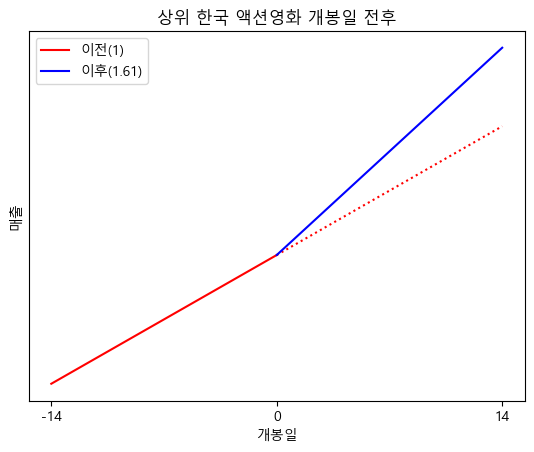

In [202]:
# 데이터 생성
x = np.array([-14, 0, 14])
y1 = x
y2 = 1.61 * x

# 그래프 그리기
plt.plot([-14, 0], [0, 1], color='red', label='이전(1)')
plt.plot([0, 14], [1, 2], color='red', linestyle='dotted', label='이전(1)')
plt.plot([0, 14], [1, 2.61], color='blue', label='이후(1.61)')

# 축과 제목 설정
plt.xlabel('개봉일')
plt.ylabel('매출')
plt.title('상위 한국 액션영화 개봉일 전후')

# x축 눈금과 레이블 설정
plt.xticks(x, x)

# y축 레이블 설정
plt.yticks([])

# 범례 표시 (첫 번째와 세 번째 항목만 표시)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[0], handles[2]], [labels[0], labels[2]])

# 그래프 출력
plt.show()

# 전체 액션영화 하는중

In [109]:
test = action_movies[action_movies['영화명'] == all_act_name[28]]
test

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
9671,25,스나이퍼 3,2005-02-24,15세관람가,액션,미국,미국,데스티네이션 필름,소니픽쳐스릴리징코리아,P.J. 페스,"톰 베린저,바이런 만",2005-02-22,4000,4000,1,1,1,1
9694,26,스나이퍼 3,2005-02-24,15세관람가,액션,미국,미국,데스티네이션 필름,소니픽쳐스릴리징코리아,P.J. 페스,"톰 베린저,바이런 만",2005-02-23,7000,11000,1,2,1,1


In [110]:
test['개봉일'].iloc[0]

'2005-02-24'

In [111]:
test = action_movies[action_movies['영화명'] == all_act_name[640]]
# 날짜 데이터 datetime형으로 변환
test['개봉일'] = pd.to_datetime(test['개봉일'])
test['기준일'] = pd.to_datetime(test['기준일'])

# 개봉일 이전 데이터만 추출
before_test = test[test['기준일'] < test['개봉일']]
# 개봉일 이전 기간
before_open = (before_test['개봉일'].iloc[0] - before_test['기준일'].iloc[0]).days
before_open_sales = before_test['누적매출액'].iloc[-1]


# 개봉일 이후 데이터만 추출
after_test = test[test['기준일'] >= test['개봉일']]
# 개봉일 이후 기간
after_open = (after_test['기준일'].iloc[-1] - after_test['개봉일'].iloc[0]).days
# 개봉일 이후 매출액
after_open_sales = after_test['누적매출액'].iloc[-1]
after_open_sales

7010197126

In [112]:
after_test

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
183017,1,동창생,2013-11-06,15세이상관람가,"액션,드라마",한국,한국,"더램프(주),(주)황금물고기",(주)쇼박스,박홍수,"최승현,한예리,윤제문,조성하,김유정,배성민,백주연,서정훈,송은영,안성민,이미지,이소...",2013-11-06,829715500,876848000,125671,132182,589,3088
183149,1,동창생,2013-11-06,15세이상관람가,"액션,드라마",한국,한국,"더램프(주),(주)황금물고기",(주)쇼박스,박홍수,"최승현,한예리,윤제문,조성하,김유정,배성민,백주연,서정훈,송은영,안성민,이미지,이소...",2013-11-07,835524500,1712372500,130735,262917,636,3241
183243,2,동창생,2013-11-06,15세이상관람가,"액션,드라마",한국,한국,"더램프(주),(주)황금물고기",(주)쇼박스,박홍수,"최승현,한예리,윤제문,조성하,김유정,배성민,백주연,서정훈,송은영,안성민,이미지,이소...",2013-11-08,705682500,2418055000,103188,366105,660,3269
183327,2,동창생,2013-11-06,15세이상관람가,"액션,드라마",한국,한국,"더램프(주),(주)황금물고기",(주)쇼박스,박홍수,"최승현,한예리,윤제문,조성하,김유정,배성민,백주연,서정훈,송은영,안성민,이미지,이소...",2013-11-09,1243783000,3661838000,172238,538343,659,3536
183437,2,동창생,2013-11-06,15세이상관람가,"액션,드라마",한국,한국,"더램프(주),(주)황금물고기",(주)쇼박스,박홍수,"최승현,한예리,윤제문,조성하,김유정,배성민,백주연,서정훈,송은영,안성민,이미지,이소...",2013-11-10,1096012000,4757850000,151266,689609,651,3390
183522,2,동창생,2013-11-06,15세이상관람가,"액션,드라마",한국,한국,"더램프(주),(주)황금물고기",(주)쇼박스,박홍수,"최승현,한예리,윤제문,조성하,김유정,배성민,백주연,서정훈,송은영,안성민,이미지,이소...",2013-11-11,367504500,5125354500,56249,745858,614,3079
183617,2,동창생,2013-11-06,15세이상관람가,"액션,드라마",한국,한국,"더램프(주),(주)황금물고기",(주)쇼박스,박홍수,"최승현,한예리,윤제문,조성하,김유정,배성민,백주연,서정훈,송은영,안성민,이미지,이소...",2013-11-12,304664000,5430018500,48105,793963,623,3025
183708,2,동창생,2013-11-06,15세이상관람가,"액션,드라마",한국,한국,"더램프(주),(주)황금물고기",(주)쇼박스,박홍수,"최승현,한예리,윤제문,조성하,김유정,배성민,백주연,서정훈,송은영,안성민,이미지,이소...",2013-11-13,283402000,5713420500,44136,838099,614,2979
183804,4,동창생,2013-11-06,15세이상관람가,"액션,드라마",한국,한국,"더램프(주),(주)황금물고기",(주)쇼박스,박홍수,"최승현,한예리,윤제문,조성하,김유정,배성민,백주연,서정훈,송은영,안성민,이미지,이소...",2013-11-14,133726000,5847146500,22471,860570,397,1438
183897,4,동창생,2013-11-06,15세이상관람가,"액션,드라마",한국,한국,"더램프(주),(주)황금물고기",(주)쇼박스,박홍수,"최승현,한예리,윤제문,조성하,김유정,배성민,백주연,서정훈,송은영,안성민,이미지,이소...",2013-11-15,157104074,6004250574,26002,886572,402,1431


In [113]:
after_open = (after_test['기준일'].iloc[-1] - after_test['개봉일'].iloc[0]).days
after_open

41

# 동일 영화명 확인

In [114]:
test = action_movies[action_movies['영화명'] == all_act_name[2656]]
test
len(test[test['개봉일'] == '1987-12-25'])

7

In [115]:
test = action_movies[action_movies['영화명'] == all_act_name[936]]
test

,순위,영화명,개봉일,등급,장르,대표국적,국적,제작사,배급사,감독,배우,기준일,매출액,누적매출액,관객수,누적관객수,스크린수,상영횟수
108980,16,킬러스,2010-09-02,15세이상관람가,"액션,코미디,멜로/로맨스",미국,미국,"카탈스트 필름,라이온스 게이트 필름즈",(주)넥스트엔터테인먼트월드(NEW),로버트 루게틱,"애쉬튼 커처,캐서린 헤이글",2010-08-09,2769000,2769000,426,426,2,2
109317,14,킬러스,2010-09-02,15세이상관람가,"액션,코미디,멜로/로맨스",미국,미국,"카탈스트 필름,라이온스 게이트 필름즈",(주)넥스트엔터테인먼트월드(NEW),로버트 루게틱,"애쉬튼 커처,캐서린 헤이글",2010-08-16,11942000,14711000,1792,2218,15,15
109420,19,킬러스,2010-09-02,15세이상관람가,"액션,코미디,멜로/로맨스",미국,미국,"카탈스트 필름,라이온스 게이트 필름즈",(주)넥스트엔터테인먼트월드(NEW),로버트 루게틱,"애쉬튼 커처,캐서린 헤이글",2010-08-18,3600000,18311000,450,2668,1,1
109520,19,킬러스,2010-09-02,15세이상관람가,"액션,코미디,멜로/로맨스",미국,미국,"카탈스트 필름,라이온스 게이트 필름즈",(주)넥스트엔터테인먼트월드(NEW),로버트 루게틱,"애쉬튼 커처,캐서린 헤이글",2010-08-20,2940000,21251000,392,3060,3,4
109680,18,킬러스,2010-09-02,15세이상관람가,"액션,코미디,멜로/로맨스",미국,미국,"카탈스트 필름,라이온스 게이트 필름즈",(주)넥스트엔터테인먼트월드(NEW),로버트 루게틱,"애쉬튼 커처,캐서린 헤이글",2010-08-23,3416000,24667000,488,3548,2,2
110087,21,킬러스,2010-09-02,15세이상관람가,"액션,코미디,멜로/로맨스",미국,미국,"카탈스트 필름,라이온스 게이트 필름즈",(주)넥스트엔터테인먼트월드(NEW),로버트 루게틱,"애쉬튼 커처,캐서린 헤이글",2010-08-30,2769000,27436000,426,3974,2,2
110167,65,킬러스,2010-09-02,15세이상관람가,"액션,코미디,멜로/로맨스",미국,미국,"카탈스트 필름,라이온스 게이트 필름즈",(주)넥스트엔터테인먼트월드(NEW),로버트 루게틱,"애쉬튼 커처,캐서린 헤이글",2010-09-01,0,27436000,0,3974,2,2
110249,2,킬러스,2010-09-02,15세이상관람가,"액션,코미디,멜로/로맨스",미국,미국,"카탈스트 필름,라이온스 게이트 필름즈",(주)넥스트엔터테인먼트월드(NEW),로버트 루게틱,"애쉬튼 커처,캐서린 헤이글",2010-09-02,189839000,217275000,26254,30228,254,1644
110310,2,킬러스,2010-09-02,15세이상관람가,"액션,코미디,멜로/로맨스",미국,미국,"카탈스트 필름,라이온스 게이트 필름즈",(주)넥스트엔터테인먼트월드(NEW),로버트 루게틱,"애쉬튼 커처,캐서린 헤이글",2010-09-03,248857500,466132500,32190,62418,257,1739
110374,2,킬러스,2010-09-02,15세이상관람가,"액션,코미디,멜로/로맨스",미국,미국,"카탈스트 필름,라이온스 게이트 필름즈",(주)넥스트엔터테인먼트월드(NEW),로버트 루게틱,"애쉬튼 커처,캐서린 헤이글",2010-09-04,606459500,1072592000,83257,145675,282,1842


In [116]:
# end_index = [-2, -21, -2, -3, -4, -8]

# # 같은 영화명
# 킬러스(936) 미국(2010)(42) / 인도네시아(2015)(1)
# 해결사(1611) 한국(2010)(63) / 인도(2013)(8) / 카자흐스탄(2017)(12)
# 응징자(1855) 한국(2013)(22) / 미국(1989)(1)
# 메카닉(2086) 미국(2011)(37) / 미국(1974)(2)
# 카운트다운(2248) 한국(2011)(48) / 미국(2016)(3)
# 로보캅(2656) 미국(2014)(33) / 미국(1987)(7)

In [117]:
before_open_sum_a = 0
before_open_sales_sum_a = 0
after_open_sum_a = 0
after_open_sales_sum_a = 0
before_open_rating_sum_a = 0
after_open_rating_sum_a = 0
j = 0
k = 0


# 동일 영화명 처리용
end_index = [-2, -21, -2, -3, -4, -8]

for i in range(len(all_act_mv)):
    test_a = action_movies[action_movies['영화명'] == all_act_name[i]]
    # 날짜 데이터 datetime형으로 변환
    test_a['개봉일'] = pd.to_datetime(test_a['개봉일'])
    test_a['기준일'] = pd.to_datetime(test_a['기준일'])
    
    try:
        # 개봉일 이전 데이터만 추출
        before_test_a = test_a[test_a['기준일'] < test_a['개봉일']]
        # 개봉일 이전 기간
        before_open_a = (before_test_a['개봉일'].iloc[0] - before_test_a['기준일'].iloc[0]).days
        # 개봉일 이전 매출액
        before_open_sales_a = before_test_a['누적매출액'].iloc[-1]
        try:
            # 개봉일 이후 데이터만 추출
            after_test_a = test_a[test_a['기준일'] >= test_a['개봉일']]
            # 개봉일 이후 기간
            after_open_a = (after_test_a['기준일'].iloc[-1] - after_test_a['개봉일'].iloc[0]).days
            # 개봉일 이후 매출액
            after_open_sales_a = after_test_a['누적매출액'].iloc[-1]
        
        except:
            continue

        # 이상값 확인용
        if (((after_open_sales_a - before_open_sales_a) / after_open_sales_a)*100).round(2) < 0:
            # 개봉일 이후 데이터만 추출
            after_test_a = test_a[test_a['기준일'] >= test_a['개봉일']]
            # 개봉일 이후 기간
            after_open_a = (after_test_a['기준일'].iloc[end_index[j]] - after_test_a['개봉일'].iloc[0]).days
            # 개봉일 이후 매출액
            after_open_sales_a = after_test_a['누적매출액'].iloc[end_index[j]]
            # 개봉일 이후 기간 누적
            after_open_sum_a = after_open_sum_a + after_open_a
            # 개봉일 이후 매출액 누적
            after_open_sales_sum_a = after_open_sales_sum_a + after_open_sales_a
            j = j + 1
            
        # 개봉일 이전 기간 누적
        before_open_sum_a = before_open_sum_a + before_open_a
        # 개봉일 이후 기간 누적
        after_open_sum_a = after_open_sum_a + after_open_a
        # 개봉일 이전 매출액 누적
        before_open_sales_sum_a = before_open_sales_sum_a + before_open_sales_a
        # 개봉일 이후 매출액 누적
        after_open_sales_sum_a = after_open_sales_sum_a + after_open_sales_a
        # 개봉일 이전 비율
        before_open_rating_a = ((before_open_sales_a / after_open_sales_a)*100).round(2)
        # 개봉일 이후 비율
        after_open_rating_a = (((after_open_sales_a - before_open_sales_a) / after_open_sales_a)*100).round(2)
        # 개봉일 이전 비율 누적
        before_open_rating_sum_a = before_open_rating_sum_a + before_open_rating_a
        # 개봉일 이후 비율 누적
        after_open_rating_sum_a = after_open_rating_sum_a + after_open_rating_a
        
    except:
        # 개봉일 이전 기간
        before_open_a = 0
        # 개봉일 이전 매출액
        before_open_sales_a = 0
        # 개봉일 이후 데이터만 추출
        after_test_a = test_a[test_a['기준일'] >= test_a['개봉일']]
        # 개봉일 이후 기간
        after_open_a = (after_test_a['기준일'].iloc[-1] - after_test_a['개봉일'].iloc[0]).days
        # 개봉일 이후 매출액
        after_open_sales_a = after_test_a['누적매출액'].iloc[-1]
        # 이상값 확인용
        if (((after_open_sales_a - before_open_sales_a) / after_open_sales_a)*100).round(2) < 0:
            # 개봉일 이후 데이터만 추출
            after_test_a = test_a[test_a['기준일'] >= test_a['개봉일']]
            # 개봉일 이후 기간
            after_open_a = (after_test_a['기준일'].iloc[end_index[k]] - after_test_a['개봉일'].iloc[0]).days
            # 개봉일 이후 매출액
            after_open_sales_a = after_test_a['누적매출액'].iloc[end_index[k]]
            # 개봉일 이후 기간 누적
            after_open_sum_a = after_open_sum_a + after_open_a
            # 개봉일 이후 매출액 누적
            after_open_sales_sum_a = after_open_sales_sum_a + after_open_sales_a
            k = k + 1
            
        # 개봉일 이전 기간 누적
        before_open_sum_a = before_open_sum_a + before_open_a
        # 개봉일 이후 기간 누적
        after_open_sum_a = after_open_sum_a + after_open_a
        # 개봉일 이전 매출액 누적
        before_open_sales_sum_a = before_open_sales_sum_a + before_open_sales_a
        # 개봉일 이후 매출액 누적
        after_open_sales_sum_a = after_open_sales_sum_a + after_open_sales_a
        # 개봉일 이전 비율
        before_open_rating_a = ((before_open_sales_a / after_open_sales_a)*100).round(2)
        # 개봉일 이후 비율
        after_open_rating_a = (((after_open_sales_a - before_open_sales_a) / after_open_sales_a)*100).round(2)
        
        if before_open_rating_a >= 0.0:
            if after_open_rating_a >= 0.0:
                # 개봉일 이전 비율 누적
                before_open_rating_sum_a = round(before_open_rating_sum_a + before_open_rating_a,2)
                # 개봉일 이후 비율 누적
                after_open_rating_sum_a = round(after_open_rating_sum_a + after_open_rating_a,2)
        else:
            # 개봉일 이전 비율 누적
            before_open_rating_sum_a = round(before_open_rating_sum_a + 0.0,2)
            # 개봉일 이후 비율 누적
            after_open_rating_sum_a = round(after_open_rating_sum_a + 0.0,2)    

print(f'개봉전 누적일 : {before_open_sum_a}일\n개봉전 판매액 : {before_open_sales_sum_a}원\n개봉전 비율 : {before_open_rating_sum_a.round(2)}%')
print(f'개봉후 누적일 : {after_open_sum_a}일\n개봉후 판매액 : {after_open_sales_sum_a}원\n개봉후 비율 : {after_open_rating_sum_a.round(2)}%')

개봉전 누적일 : 26938일
개봉전 판매액 : 86771361037원
개봉전 비율 : 9304.43%
개봉후 누적일 : 4281221일
개봉후 판매액 : 10121165085794원
개봉후 비율 : 288895.57%


In [118]:
len(all_act_mv)

3002

In [119]:
before_open_avg_a = round(before_open_sum_a/len(all_act_mv),2)
before_open_sales_avg_a = round(before_open_sales_sum_a/len(all_act_mv),2)
before_open_rating_avg_a = round(before_open_rating_sum_a/len(all_act_mv),2)

after_open_avg_a = round(after_open_sum_a/len(all_act_mv),2)
after_open_sales_avg_a = round(after_open_sales_sum_a/len(all_act_mv),2)
after_open_rating_avg_a = round(after_open_rating_sum_a/len(all_act_mv),2)

print(f'개봉전 평균 누적일 : {before_open_avg_a}일\n개봉전 평균 판매액 : {before_open_sales_avg_a}원\n개봉전 평균 비율 : {before_open_rating_avg_a.round(2)}%')
print(f'개봉후 평균 누적일 : {after_open_avg_a}일\n개봉후 평균 판매액 : {after_open_sales_avg_a}원\n개봉후 평균 비율 : {after_open_rating_avg_a.round(2)}%')

개봉전 평균 누적일 : 8.97일
개봉전 평균 판매액 : 28904517.33원
개봉전 평균 비율 : 3.1%
개봉후 평균 누적일 : 1426.12일
개봉후 평균 판매액 : 3371474045.9원
개봉후 평균 비율 : 96.23%


# 전체 액션영화 개봉일 전후 시각화

In [205]:
# 개봉일 이전 기울기
xy1_a = round((before_open_sales_avg_a - 0) / (before_open_avg_a - 0),2)

# 개봉일 이후 기울기
xy2_a = round((after_open_sales_avg_a - before_open_sales_avg_a) / (after_open_avg_a - before_open_avg_a),2)

print(f'개봉일 이전 기울기 : {xy1_a}\n개봉일 이후 기울기 : {xy2_a}\n개봉일 이후 / 개봉일 이전 : {(xy1_a/xy2_a).round(2)}')

개봉일 이전 기울기 : 3222354.22
개봉일 이후 기울기 : 2358656.13
개봉일 이후 / 개봉일 이전 : 1.37


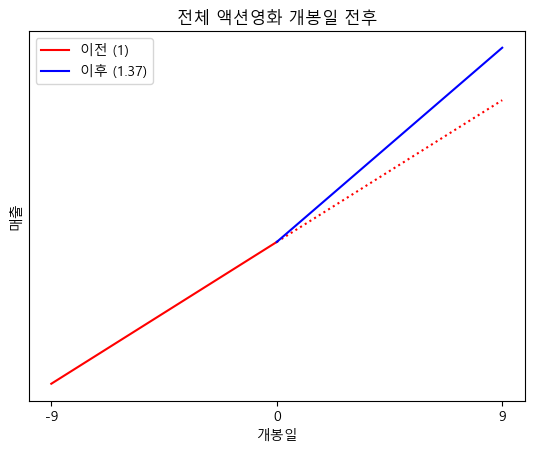

In [198]:
# 데이터 생성
x = np.array([-9, 0, 9])
y1 = x
y2 = 1.37 * x

# 그래프 그리기
plt.plot([-9,0], [0, 1], color='red', label='이전 (1)')
plt.plot([0,9], [1, 2], color='red', linestyle='dotted', label='이전 (1)')
plt.plot([0,9], [1, 2.37], color='blue', label='이후 (1.37)')

# 축과 제목 설정
plt.xlabel('개봉일')
plt.ylabel('매출')
plt.title('전체 액션영화 개봉일 전후')

# x축 눈금과 레이블 설정
plt.xticks(x, x)
# y축 레이블 설정
plt.yticks([])

# 범례 표시 (첫 번째와 세 번째 항목만 표시)
handles, labels = plt.gca().get_legend_handles_labels()
plt.legend([handles[0], handles[2]], [labels[0], labels[2]])

# 그래프 출력
plt.show()